<h1 style="color:#3498DB;font-size:50px;font-family:Georgia;text-align:center;"><strong>EEET2485 - Research Methods for Engineers</strong></h1>
<h1 style="color:#3498DB;font-size:50px;font-family:Georgia;text-align:center;"><strong>Group Assignment</strong></h1>
<h2 style="color:#3498DB;font-size:50px;font-family:Georgia;text-align:center;"><strong>E-Scooter Stations Analysis</strong></h2>

### <b>Students:</b>
### <b>Tran Khai Minh (s3818343)</b>
### <b>Nguyen Huy Hoang (s3764704)</b>
### <b>Nguyen Nhat Tan (s3818559)</b>
### <b>Tong Son Tung (s3818153)</b>
### <b>Nguyen Thanh Loan (s3821185)</b>

### <b>Group Number: 2</b>

### <b>Assigned Dataset: 2</b>

### <b>Lecturer: Dr. Arthur Tang</b>

### <b>Due Date: January 13, 2023</b>


<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 📜 Table of Content</strong></h1>

### [I. Data Preparation](#1)

[1.1 Introduction](#1.1) 

[1.2 Research Questions](#1.2)

[1.3 Importing neccessary libraries](#1.3)

[1.4 Importing the dataset](#1.4)

[1.5 Data information](#1.5)

<br>

### [II. Data Cleaning](#2)

[2.1 About this dataset](#2.1)

[2.2 Drop duplicate(s)](#2.2)

<br>

### [III. Exploratory data analysis (EDA)](#3)

[3.1 Outliers](#3.1)

> - 3.1.1 [Descriptive statistics for Central Tendency](#3.1.1) 
> - 3.1.2 [Detecting and Dealing with outliers](#3.1.2) 

[3.2 Analysis for Research Questions](#3.2)

> - [3.2.1 RQ1: Which weather factor(s) most likely affect the number of casual e-scooter rentees?](#3.2.1) 
> - [3.2.2 RQ2: Which weather factor(s) most likely affect the number of registered e-scooter rentees?](#3.2.2) 
> - [3.2.3 RQ3: Which weather factor(s) most likely affect the number of newly-registered e-scooter rentees?](#3.2.3) 
> - [3.2.4 RQ4, RQ5: Which season are people most/least likely to rent an e-scooter?](#3.2.4) 
> - [3.2.5 RQ6, RQ7: Which station has the most/least e-scooter rent in a single day?](#3.2.5) 


<br>

### [IV. References](#4)

<hr>

<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> ✍️ 1. Data Preparation</strong></h1>

<a id="1.1"></a>
# ️🎯 1.1 Introduction
****
<p style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black"> The world population has shown a considerable upward trend recently, so that the buying and selling an occupation has received a great academic attention. In this project, we have conducted research on a provided dataset which is about the “Room Occupancy Estimation” by Adarsh Pal Singh and Dr. Sachin Chaudhari.  We examined machine behavior pattern in numerous aspects using approaches and analytical tools provided in Pandas, including factor collaborations, data probability distributions, and room occupancy causes. Based on the defined aspects, we develop a list of research questions to investigate the nature of our dataset based on the mentioned features.</p>

<a id="1.2"></a>
# ️🎯 1.2 Research Questions (RQs)
****
> - ***RQ1: Which weather factor(s) most likely affect the number of casual e-scooter rentees?***

> - ***RQ2: Which weather factor(s) most likely affect the number of registered e-scooter rentees?***

> - ***RQ3: Which weather factor(s) most likely affect the number of newly-registered e-scooter rentees?***

> - ***RQ4: Which season are people most likely to rent an e-scooter?***
> - ***RQ5: Which season are people least likely to rent an e-scooter?***

> - ***RQ6: Which station has the most e-scooter rent in a single day?***
> - ***RQ7: Which station has the least e-scooter rent in a single day?***


<a id="1.3"></a>
# ✴️ 1.3 Importing neccessary libraries
****

In [1]:
# Turning off warninng
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [2]:
import sys
!{sys.executable} -m pip -q install pingouin

# import libraries which are pandas and numpy
import pandas as pd
import numpy as np
#This is is for Correlation test
from scipy.stats import pearsonr
#This is is for Mann-Whitney Testing
import scipy.stats as stats
# importing the chsq test
from scipy.stats import chi2_contingency
#This is for ANOVA test
from scipy.stats import f_oneway
from scipy.stats import levene
import pingouin as pg


#for plots
import matplotlib.pyplot as plt
#This is for setting the size of plots
plt.rcParams["figure.figsize"]= 15,10
import statsmodels.api as sm #This is for state model report


#Libraries for plotting
# Modules for data visualization
import seaborn as sns
import matplotlib.patches as mpatches
sns.set_theme(style="ticks", color_codes=True) #set theme in seaborn
# scatter matrix library

import warnings ## importing warnings library. 
warnings.filterwarnings('ignore') ## Ignore warning

/Users/chaunguyen/opt/anaconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## Check numpy and pandas version

In [3]:
# check the version of the packages
print("Numpy version: ", np.__version__)
print("Pandas version: ",pd.__version__)
! python --version

Numpy version:  1.21.5
Pandas version:  1.4.4
Python 3.9.13


### Discussion:
***
I want to check the numpy and pandas version since I want to make sure the verson is appropriate for my work load. Currently, it is still appropriate

<a id="1.4"></a>
# 📲 1.4 Importing the dataset
***

In [4]:
df = pd.read_excel("dataset2.xlsx")

df.columns = df.columns.str.replace(' ', '') #strip the extra-whitespaces out

print("The shape of the ORGINAL data is (row, column):", str(df.shape))

# drop Unnamed, it is just a number given to identify each house
df.head(3)

The shape of the ORGINAL data is (row, column): (8760, 19)


StationNumber                 Date  CasualUser  RegisteredUser  \
0              1  2017-01-12 00:00:00        80.0             254   
1              2  2017-01-12 00:00:00        79.0             204   
2              3  2017-01-12 00:00:00        81.0             173   

   Newregistereduser  Temperature(°C)  Humidity(%)  Windspeed(m/s)  \
0                  5             -5.2           37             2.2   
1                  6             -5.5           38             0.8   
2                  8             -6.0           39             1.0   

   Visibility(10m)  Dewpointtemperature(°C)  SolarRadiation(MJ/m2)  \
0             2000                    -17.6                    0.0   
1             2000                    -17.6                    0.0   
2             2000                    -17.7                    0.0   

   Rainfall(mm)  Snowfall(cm) Seasons OperationDay  TotalUser  \
0           0.0           0.0  Winter          Yes      339.0   
1           0.0           0.0  Winter          Yes      289.0   
2           0.0           0.0  Winter          Yes      262.0   

   CasualUserPercentage  RegisteredUserPercentage  NewRegisteredUserPercentage  
0             23.598820                 74.926254                     1.474926  
1             27.335640                 70.588235                     2.076125  
2             30.916031                 66.030534                     3.053435

<a id="1.5"></a>
# 🔈 1.5 Data Information
****
I want to have an overall look on both of the train and test dataset, so I use .shape and .info() function in python to do that.

In [5]:
print ("The shape of the train data is (row, column):"+ str(df.shape))
print (df.info())

The shape of the train data is (row, column):(8760, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   StationNumber                8760 non-null   int64  
 1   Date                         8760 non-null   object 
 2   CasualUser                   8760 non-null   float64
 3   RegisteredUser               8760 non-null   int64  
 4   Newregistereduser            8760 non-null   int64  
 5   Temperature(°C)              8760 non-null   float64
 6   Humidity(%)                  8760 non-null   int64  
 7   Windspeed(m/s)               8760 non-null   float64
 8   Visibility(10m)              8760 non-null   int64  
 9   Dewpointtemperature(°C)      8760 non-null   float64
 10  SolarRadiation(MJ/m2)        8760 non-null   float64
 11  Rainfall(mm)                 8760 non-null   float64
 12  Snowfall(cm)        

### Discussion:
***
From this, the information that I gained from the train dataset are the total record is 8760 with no missing and it has 15 columns with the target variable `OperationDay`.

<a id="2"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 🧹 2. Data Cleaning</strong></h1>

<a id="2.1"></a>
# 🦄 2.1 About This Dataset
***
Let's investigate the datatype of the dataset a little bit.
***
**Categorical:**    
- **Nominal** (variables that have two or more categories, but which do not have an intrinsic order.)
 >  - **Seasons**: The current season on the day of the record
 >  - **OperationDay**: Whether the station is open on the day of the record

***
**Numeric:**
- **Continuous**
    >  - **Temperature(°C)**: Average temperature at the station on the day of the record
    >  - **Humidity(%)**: Average humidity at the station on the day of the record
    >  - **Windspeed(m/s)**: Average wind speed at the station on the day of the record
    >  - **Visibility(10m)**: Average visibility at the station on the day of the record
    >  - **Dewpointtemperature**: Average dew point temperature at the station on the day of the record
    >  - **SolarRadiation(MJ/m2)**: Average solar radiation at the station on the day of the record
    >  - **Rainfall(mm)**: Average rainfall rate at the station on the day of the record
    >  - **Snowfall(cm)**: Average snowfall rate at the station on the day of the record
  

<a id="2.2"></a>
# 🦄 2.2 Drop duplicate
***
Firstly, any duplicated entry should be dropped.

In [6]:
print ("The shape of the dataset before dropping duplicate entries:"+ str(df.shape))

df = df.drop_duplicates()

print ("The shape of the dataset after dropping duplicate entries:"+ str(df.shape))

The shape of the dataset before dropping duplicate entries:(8760, 19)
The shape of the dataset after dropping duplicate entries:(8760, 19)


### Discussion:
***
There is no duplicate entry in this dataset.

<a id="3"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 📊 3. Data Exploration </strong></h1>

****

<a id="3.1"></a>
# 3.1 Outliers
****
## Detect and Dropping regulation: 
For the outliers, I want to detect them first. There are 2 scenarios which is the percentage of outliers is less than and equal 6 or the outliers is over 6 percent. For the percentage of outliers which is equal or less than 6, I will drop them since it does not effect much to our data, however, if the percentage of outliers is higher than 6 then I will investigate more. In case, all of the outliers have at least 1 person in that room, I do not drop it, since it indicate that in the "extreme" condition, that room have at least one people. In the scenario that there is just about less than 20 percent of the outliers have at least 1 people in the room, then I will drop that outliers since those outliers are just the noise data, which cause bias for the later model. Lastly, if there is more than 60 percent of outliers have at least one people in the room, then I will just drop the noise that do not have anyone in room. 
*****
## Outliers Dealing Method: 
I will deal outliers with box plot and IQR-distance from Median. The Z-Score, Quantile Filter, and IQR-distance from Median are three common methods for dealing with outliers. The Z-Score is used to calculate the mean and standard deviation. As a result, the evaluation of outliers may be skewed. The Quantile Filter is a superior strategy, however it can remove some of the parts that aren't outliers, resulting in a significant quantity of good data being lost while the outliers remain.

The minimum is known as Q0, the lower quartile is known as Q1, the median is known as Q2, the upper quartile is known as Q3, and the maximum is known as Q4. Q1, Q2, and Q3 mean:
> - Q1: greater than one-quarter of the data
> -Q2: greater than two-quarters of the data.
> -Q3: more than three-quarters of the data.

The InterQuatile Range, or IQR, is what is measured when the spread is measured. The IQR shows how evenly distributed the middle half of the data is. As a result of measuring IQR, values that are far from the center are identified and labeled as outliers.)

<a id="3.1.1"></a>
## 3.1.1 Descriptive statistics for Central Tendency

In [7]:
# see the static of all numerical column
df.describe().T

count         mean         std   min  \
StationNumber                8760.0    12.500000    6.922582   1.0   
CasualUser                   8760.0   279.777523  266.546813   0.0   
RegisteredUser               8760.0   704.602055  644.997468   0.0   
Newregistereduser            8760.0    22.454566   22.155487   0.0   
Temperature(°C)              8760.0    12.993653   12.271382 -17.8   
Humidity(%)                  8760.0    58.226256   20.362413   0.0   
Windspeed(m/s)               8760.0     1.724909    1.036300   0.0   
Visibility(10m)              8760.0  1436.825799  608.298712  27.0   
Dewpointtemperature(°C)      8760.0     4.073813   13.060369 -30.6   
SolarRadiation(MJ/m2)        8760.0     0.569111    0.868746   0.0   
Rainfall(mm)                 8760.0     0.148687    1.128193   0.0   
Snowfall(cm)                 8760.0     0.075068    0.436746   0.0   
TotalUser                    8760.0  1006.834144  930.154714   1.0   
CasualUserPercentage         8760.0    29.139219   13.772225   0.0   
RegisteredUserPercentage     8760.0    68.838421   13.498710   0.0   
NewRegisteredUserPercentage  8760.0     2.022360    0.955831   0.0   

                                    25%          50%          75%         max  
StationNumber                  6.750000    12.500000    18.250000    24.00000  
CasualUser                    69.000000   195.000000   424.000000  1599.00000  
RegisteredUser               191.000000   504.500000  1065.250000  3556.00000  
Newregistereduser              5.000000    15.000000    34.000000   159.00000  
Temperature(°C)                3.500000    13.800000    22.600000   124.00000  
Humidity(%)                   42.000000    57.000000    74.000000    98.00000  
Windspeed(m/s)                 0.900000     1.500000     2.300000     7.40000  
Visibility(10m)              940.000000  1698.000000  2000.000000  2000.00000  
Dewpointtemperature(°C)       -4.700000     5.100000    14.800000    27.20000  
SolarRadiation(MJ/m2)          0.000000     0.010000     0.930000     3.52000  
Rainfall(mm)                   0.000000     0.000000     0.000000    35.00000  
Snowfall(cm)                   0.000000     0.000000     0.000000     8.80000  
TotalUser                    267.000000   715.500000  1522.250000  5193.00000  
CasualUserPercentage          25.026670    27.066892    29.480517   100.00000  
RegisteredUserPercentage      68.213764    70.805825    73.015873   100.00000  
NewRegisteredUserPercentage    1.764608     2.066116     2.400000    31.33515

<AxesSubplot:>

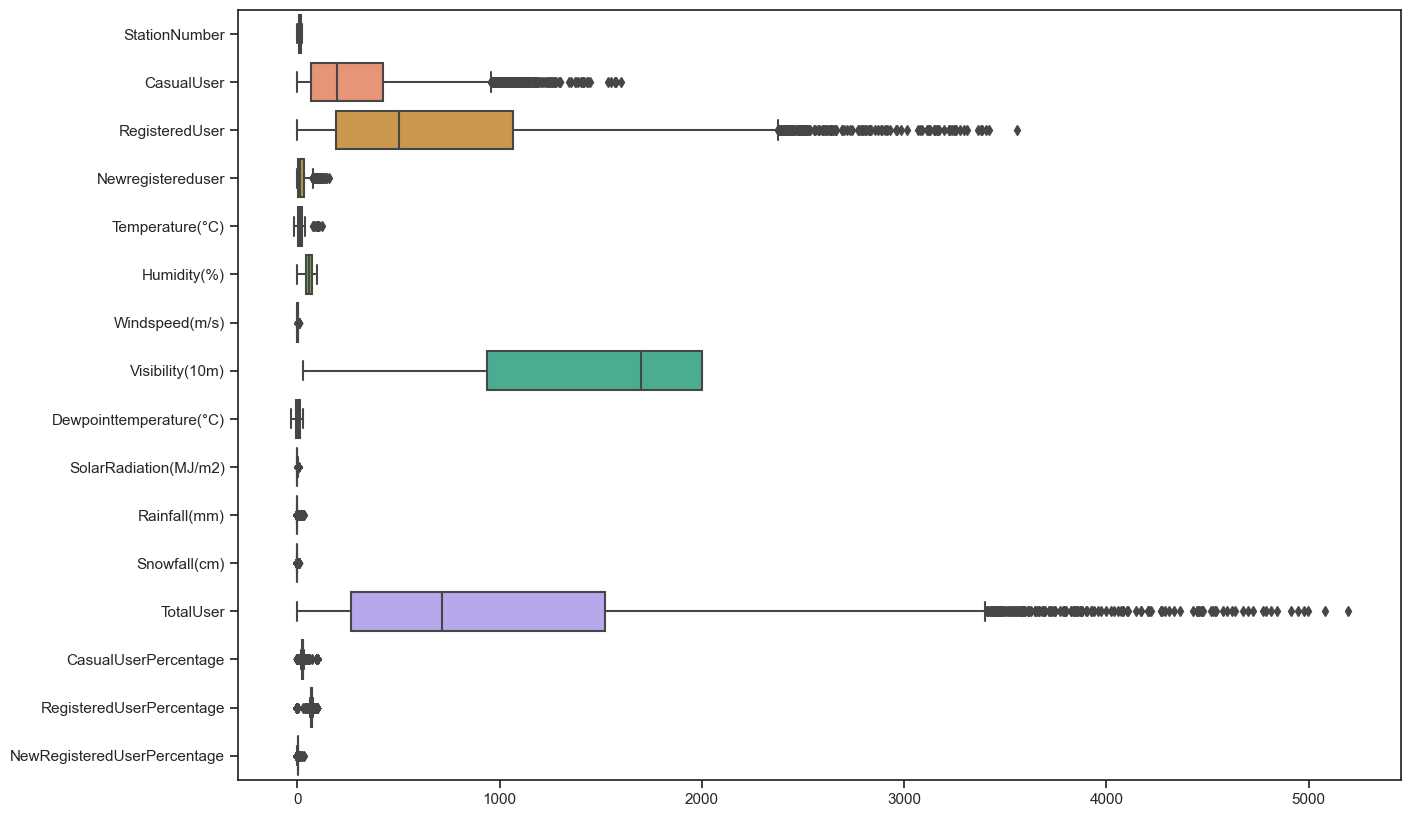

In [8]:
# plot the boxplot to see the outlier of each numerical column
plt.figure(figsize= (15,10))
sns.boxplot(data=df,orient="h")

### ---------> OBSERVATION
> There are some unrealistic values in `Temperature` and `Humidity`. I want to explore it first.

## Temperature

### Interquartile Range

In [9]:
# calculate the q1 and q3 and then the iqr
q1_Temperature = df['Temperature(°C)'].quantile(.25)
q3_Temperature = df['Temperature(°C)'].quantile(.75)
iqr_Temperature = q3_Temperature - q1_Temperature

print("q1_Temperature:", q1_Temperature, "\n")
print("q3_Temperature:", q3_Temperature, "\n")
print("iqr_Temperature:", iqr_Temperature)

q1_Temperature: 3.5 

q3_Temperature: 22.6 

iqr_Temperature: 19.1


### Descriptive statistics for Variability

In [10]:
# look at the Temperature mean
Temperature_mean = df['Temperature(°C)'].mean()
print("Temperature_mean:", Temperature_mean)
# look at the Temperature median
Temperature_median = df['Temperature(°C)'].median()
print("Temperature_median:", Temperature_median)
# look at the Temperature mode
Temperature_mode = df['Temperature(°C)'].mode().values[0]
print("Temperature_mode:", Temperature_mode)

Temperature_mean: 12.99365296803654
Temperature_median: 13.8
Temperature_mode: 19.1


(0.0, 550.0)

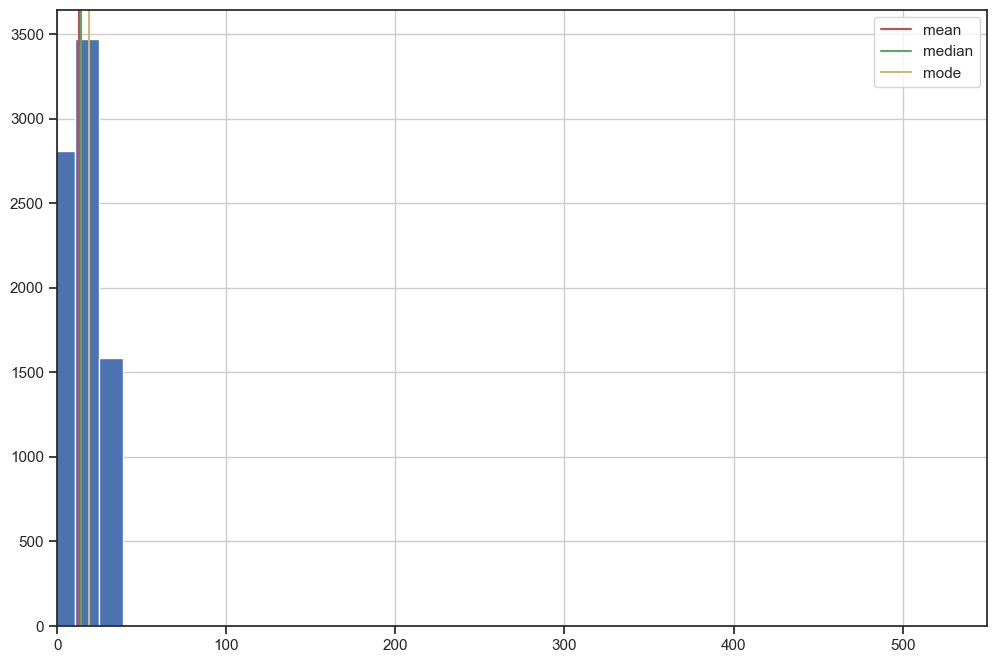

In [11]:
# plot the histogram with mean, median, and mode included
plt.figure(figsize=(12, 8))

df['Temperature(°C)'].hist()

plt.axvline(Temperature_mean, color='r', label='mean')
plt.axvline(Temperature_median, color='g', label='median')
plt.axvline(Temperature_mode, color='y', label='mode')

plt.legend()

# plt.ylim(0,50000)
plt.xlim(0,550)

### Discussion:
> - The mean lower than the median indicates that the data is skewed to the right.
> - Moreover, it is impossible for the `Temperature(°C)` to have the value is higher than the world highest record for Temperature [[1](#Link1)]. Therefore, there are outliers in this features.

## Humidity
*****
### Interquartile Range

In [12]:
# calculate the q1 and q3 and then the iqr
q1_Humidity = df['Humidity(%)'].quantile(.25)
q3_Humidity = df['Humidity(%)'].quantile(.75)
iqr_Humidity = q3_Humidity - q1_Humidity

print("q1_Humidity:", q1_Humidity, "\n")
print("q3_Humidity:", q3_Humidity, "\n")
print("iqr_Humidity:", iqr_Humidity)

q1_Humidity: 42.0 

q3_Humidity: 74.0 

iqr_Humidity: 32.0


### Descriptive statistics for Variability

In [13]:
# look at the Humidity mean
Humidity_mean = df['Humidity(%)'].mean()
print("Humidity_mean:", Humidity_mean)
# look at the Humidity median
Humidity_median = df['Humidity(%)'].median()
print("Humidity_median:", Humidity_median)
# look at the Humidity mode
Humidity_mode = df['Humidity(%)'].mode().values[0]
print("Humidity_mode:", Humidity_mode)

Humidity_mean: 58.226255707762554
Humidity_median: 57.0
Humidity_mode: 53


(0.0, 550.0)

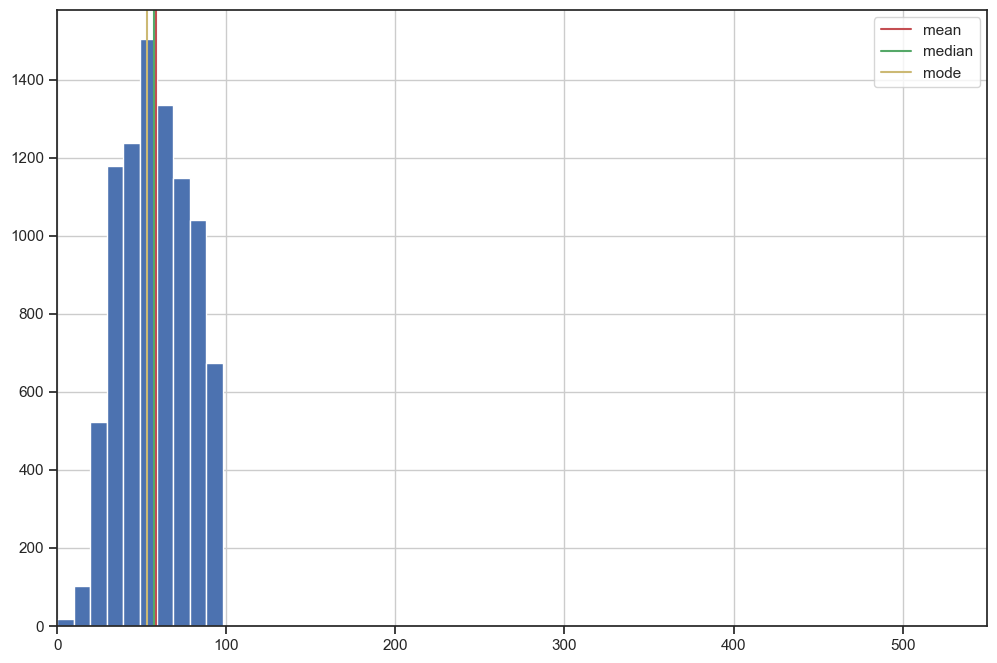

In [14]:
# plot the histogram with mean, median, and mode included
plt.figure(figsize=(12, 8))

df['Humidity(%)'].hist()

plt.axvline(Humidity_mean, color='r', label='mean')
plt.axvline(Humidity_median, color='g', label='median')
plt.axvline(Humidity_mode, color='y', label='mode')

plt.legend()

# plt.ylim(0,50000)
plt.xlim(0,550)

### Discussion:
****
> - The mean larger than the median indicates that the data is skewed to the left.
> - Moreover, it is impossible for the `Humidity(%)` to have the value is higher than the world highest record for Humidity [[2](#Link2)]. Therefore, there are outliers in this features.

<a id="3.1.2"></a>
## 3.1.2 Detecting and Dealing with outliers

In [15]:
def detect_outliers_IQR(df):
   #Calculate the Q1:
   Q1 = np.percentile(df, 25)
   #Calculate the Q3:
   Q3 = np.percentile(df, 75)
   #Calculate the IQR:
   IQR=Q3-Q1
   # Upper bound
   upper = np.where(df >= (Q3+1.5*IQR))
   # Lower bound
   lower = np.where(df <= (Q1-1.5*IQR))
   #Outliers
   outliers = df[((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
   return outliers, upper, lower

> **`Temperature(°C)` column**

<AxesSubplot:>

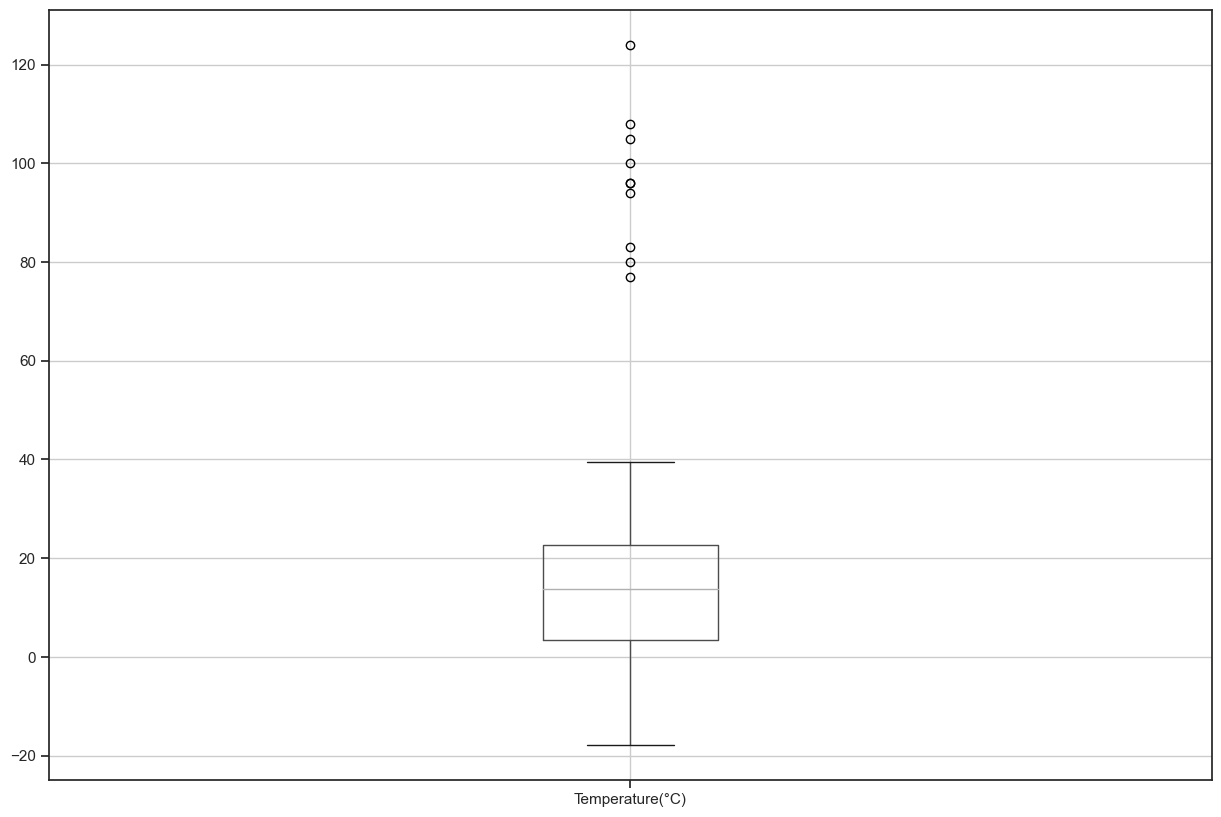

In [16]:
plt.figure(figsize= (15,10))

df.boxplot(column= "Temperature(°C)")

In [17]:
outliers, upper, lower = detect_outliers_IQR(df['Temperature(°C)'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))


number of outliers: 10
max outlier value: 124.0
min of outliers: 77.0
Percentage of outliers: 0.1141552511415525


### Discussion:
****
The percentage of outliers in `Temperature(°C)` is extremely small so that I want to drop them since those values of are impossible

In [18]:
df.drop(upper[0], inplace = True)

> **`Humidity(%)` column**

<AxesSubplot:>

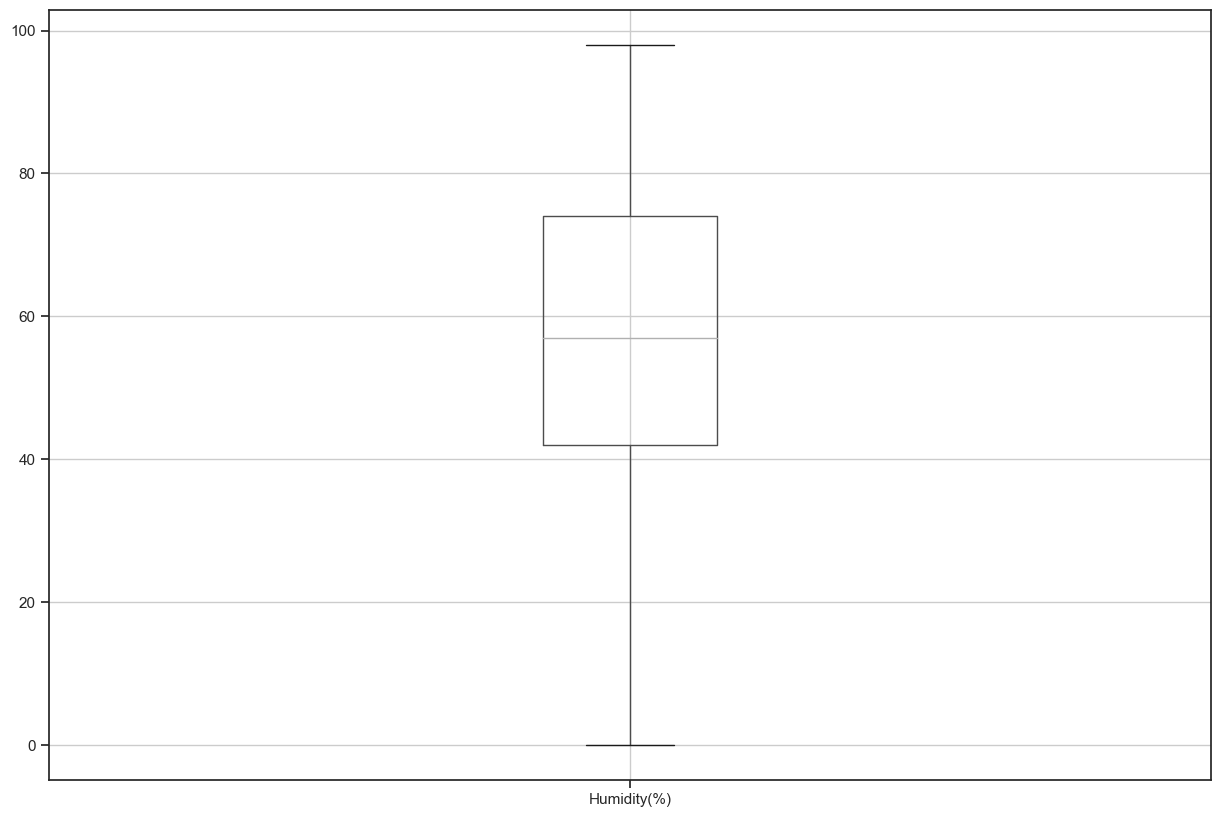

In [19]:
plt.figure(figsize= (15,10))

df.boxplot(column= "Humidity(%)")

In [20]:
outliers, upper, lower = detect_outliers_IQR(df['Humidity(%)'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))


number of outliers: 0
max outlier value: nan
min of outliers: nan
Percentage of outliers: 0.0


### Discussion:
****
Although `Humidity` have some values that might seem to be impossible, but there is no outliers

## CasualUser

In [21]:
outliers, upper, lower = detect_outliers_IQR(df['CasualUser'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))


number of outliers: 200
max outlier value: 1599.0
min of outliers: 958.0
Percentage of outliers: 2.2857142857142856


In [22]:
extreme_temp = df[(df['CasualUser'] < outliers.min()) | (df['CasualUser'] > outliers.max())]
extreme_temp.head()

StationNumber                 Date  CasualUser  RegisteredUser  \
0              1  2017-01-12 00:00:00        80.0             254   
1              2  2017-01-12 00:00:00        79.0             204   
2              3  2017-01-12 00:00:00        81.0             173   
3              4  2017-01-12 00:00:00        48.0             107   
4              5  2017-01-12 00:00:00        30.0              78   

   Newregistereduser  Temperature(°C)  Humidity(%)  Windspeed(m/s)  \
0                  5             -5.2           37             2.2   
1                  6             -5.5           38             0.8   
2                  8             -6.0           39             1.0   
3                  3             -6.2           40             0.9   
4                  3             -6.0           36             2.3   

   Visibility(10m)  Dewpointtemperature(°C)  SolarRadiation(MJ/m2)  \
0             2000                    -17.6                    0.0   
1             2000                    -17.6                    0.0   
2             2000                    -17.7                    0.0   
3             2000                    -17.6                    0.0   
4             2000                    -18.6                    0.0   

   Rainfall(mm)  Snowfall(cm) Seasons OperationDay  TotalUser  \
0           0.0           0.0  Winter          Yes      339.0   
1           0.0           0.0  Winter          Yes      289.0   
2           0.0           0.0  Winter          Yes      262.0   
3           0.0           0.0  Winter          Yes      158.0   
4           0.0           0.0  Winter          Yes      111.0   

   CasualUserPercentage  RegisteredUserPercentage  NewRegisteredUserPercentage  
0             23.598820                 74.926254                     1.474926  
1             27.335640                 70.588235                     2.076125  
2             30.916031                 66.030534                     3.053435  
3             30.379747                 67.721519                     1.898734  
4             27.027027                 70.270270                     2.702703

### Discussion:
****
In case the weather is in the extreme mode, the number of user may drop. There might be some correlation between them.

## RegisteredUser

In [23]:
outliers, upper, lower = detect_outliers_IQR(df['RegisteredUser'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))


number of outliers: 155
max outlier value: 3556
min of outliers: 2379
Percentage of outliers: 1.7714285714285714


In [24]:
extreme_temp = df[(df['RegisteredUser'] < outliers.min()) | (df['RegisteredUser'] > outliers.max())]
extreme_temp.head()

StationNumber                 Date  CasualUser  RegisteredUser  \
0              1  2017-01-12 00:00:00        80.0             254   
1              2  2017-01-12 00:00:00        79.0             204   
2              3  2017-01-12 00:00:00        81.0             173   
3              4  2017-01-12 00:00:00        48.0             107   
4              5  2017-01-12 00:00:00        30.0              78   

   Newregistereduser  Temperature(°C)  Humidity(%)  Windspeed(m/s)  \
0                  5             -5.2           37             2.2   
1                  6             -5.5           38             0.8   
2                  8             -6.0           39             1.0   
3                  3             -6.2           40             0.9   
4                  3             -6.0           36             2.3   

   Visibility(10m)  Dewpointtemperature(°C)  SolarRadiation(MJ/m2)  \
0             2000                    -17.6                    0.0   
1             2000                    -17.6                    0.0   
2             2000                    -17.7                    0.0   
3             2000                    -17.6                    0.0   
4             2000                    -18.6                    0.0   

   Rainfall(mm)  Snowfall(cm) Seasons OperationDay  TotalUser  \
0           0.0           0.0  Winter          Yes      339.0   
1           0.0           0.0  Winter          Yes      289.0   
2           0.0           0.0  Winter          Yes      262.0   
3           0.0           0.0  Winter          Yes      158.0   
4           0.0           0.0  Winter          Yes      111.0   

   CasualUserPercentage  RegisteredUserPercentage  NewRegisteredUserPercentage  
0             23.598820                 74.926254                     1.474926  
1             27.335640                 70.588235                     2.076125  
2             30.916031                 66.030534                     3.053435  
3             30.379747                 67.721519                     1.898734  
4             27.027027                 70.270270                     2.702703

### Discussion:
****
In case the weather is in the extreme mode, the number of user may drop. There might be some correlation between them.

## Newregistereduser

In [25]:
outliers, upper, lower = detect_outliers_IQR(df['Newregistereduser'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))


number of outliers: 256
max outlier value: 159
min of outliers: 78
Percentage of outliers: 2.9257142857142857


In [26]:
extreme_temp = df[(df['Newregistereduser'] < outliers.min()) | (df['Newregistereduser'] > outliers.max())]
extreme_temp.head()

StationNumber                 Date  CasualUser  RegisteredUser  \
0              1  2017-01-12 00:00:00        80.0             254   
1              2  2017-01-12 00:00:00        79.0             204   
2              3  2017-01-12 00:00:00        81.0             173   
3              4  2017-01-12 00:00:00        48.0             107   
4              5  2017-01-12 00:00:00        30.0              78   

   Newregistereduser  Temperature(°C)  Humidity(%)  Windspeed(m/s)  \
0                  5             -5.2           37             2.2   
1                  6             -5.5           38             0.8   
2                  8             -6.0           39             1.0   
3                  3             -6.2           40             0.9   
4                  3             -6.0           36             2.3   

   Visibility(10m)  Dewpointtemperature(°C)  SolarRadiation(MJ/m2)  \
0             2000                    -17.6                    0.0   
1             2000                    -17.6                    0.0   
2             2000                    -17.7                    0.0   
3             2000                    -17.6                    0.0   
4             2000                    -18.6                    0.0   

   Rainfall(mm)  Snowfall(cm) Seasons OperationDay  TotalUser  \
0           0.0           0.0  Winter          Yes      339.0   
1           0.0           0.0  Winter          Yes      289.0   
2           0.0           0.0  Winter          Yes      262.0   
3           0.0           0.0  Winter          Yes      158.0   
4           0.0           0.0  Winter          Yes      111.0   

   CasualUserPercentage  RegisteredUserPercentage  NewRegisteredUserPercentage  
0             23.598820                 74.926254                     1.474926  
1             27.335640                 70.588235                     2.076125  
2             30.916031                 66.030534                     3.053435  
3             30.379747                 67.721519                     1.898734  
4             27.027027                 70.270270                     2.702703

### Discussion:
****
In case the weather is in the extreme mode, the number of user may drop. There might be some correlation between them.

## OperationDay and User
******
During the station is closed, there should be no user.

In [27]:
df_filtered = df[(df["OperationDay"] == "No") & ((df["CasualUser"] != 0) | (df["RegisteredUser"] != 0)| (df["Newregistereduser"] != 0))]
df_filtered

StationNumber                 Date  CasualUser  RegisteredUser  \
3144              1  2018-11-04 00:00:00         1.0               0   
3145              2  2018-11-04 00:00:00         1.0               0   
3146              3  2018-11-04 00:00:00         2.0               0   
3147              4  2018-11-04 00:00:00         6.0               0   
3148              5  2018-11-04 00:00:00         7.0               0   
...             ...                  ...         ...             ...   
8251             20  2018-09-11 00:00:00         7.0               0   
8252             21  2018-09-11 00:00:00         4.0               0   
8253             22  2018-09-11 00:00:00         7.0               0   
8254             23  2018-09-11 00:00:00         2.0               0   
8255             24  2018-09-11 00:00:00         4.0               0   

      Newregistereduser  Temperature(°C)  Humidity(%)  Windspeed(m/s)  \
3144                  0             14.4           82             4.6   
3145                  0             13.6           81             3.6   
3146                  0             12.7           80             3.9   
3147                  0             11.6           81             3.1   
3148                  0             10.2           83             3.5   
...                 ...              ...          ...             ...   
8251                  0             11.9           71             2.7   
8252                  0             11.9           72             2.5   
8253                  0             11.4           74             1.9   
8254                  0             11.2           75             1.7   
8255                  0             10.9           76             1.2   

      Visibility(10m)  Dewpointtemperature(°C)  SolarRadiation(MJ/m2)  \
3144             1041                     11.3                    0.0   
3145              886                     10.3                    0.0   
3146              885                      9.3                    0.0   
3147              687                      8.4                    0.0   
3148              554                      7.4                    0.0   
...               ...                      ...                    ...   
8251              589                      6.7                    0.0   
8252              526                      7.0                    0.0   
8253              498                      6.9                    0.0   
8254              478                      6.9                    0.0   
8255              456                      6.8                    0.0   

      Rainfall(mm)  Snowfall(cm) Seasons OperationDay  TotalUser  \
3144           0.0           0.0  Spring           No        1.0   
3145           0.0           0.0  Spring           No        1.0   
3146           0.0           0.0  Spring           No        2.0   
3147           0.0           0.0  Spring           No        6.0   
3148           0.0           0.0  Spring           No        7.0   
...            ...           ...     ...          ...        ...   
8251           0.0           0.0  Autumn           No        7.0   
8252           0.0           0.0  Autumn           No        4.0   
8253           0.0           0.0  Autumn           No        7.0   
8254           0.0           0.0  Autumn           No        2.0   
8255           0.0           0.0  Autumn           No        4.0   

      CasualUserPercentage  RegisteredUserPercentage  \
3144                 100.0                       0.0   
3145                 100.0                       0.0   
3146                 100.0                       0.0   
3147                 100.0                       0.0   
3148                 100.0                       0.0   
...                    ...                       ...   
8251                 100.0                       0.0   
8252                 100.0                       0.0   
8253                 100.0                       0.0   
8254      

In [28]:
df_filtered = df[(df["OperationDay"] == "No") & ((df["CasualUser"] != 0) | (df["RegisteredUser"] != 0)| (df["Newregistereduser"] != 0))].index
df.drop(df_filtered, inplace = True)

## Windspeed

In [29]:
df_Windspeed_q_low = df["Windspeed(m/s)"].quantile(0.02)
df_Windspeed_q_hi  = df["Windspeed(m/s)"].quantile(0.99)

df_filtered = df[(df["Windspeed(m/s)"] > df_Windspeed_q_hi) | (df["Windspeed(m/s)"] < df_Windspeed_q_low)]
print(len(df_filtered)/ len(df) * 100)
df_filtered

2.2826729745712595


StationNumber                 Date  CasualUser  RegisteredUser  \
84               13  2017-04-12 00:00:00   89.318182             393   
85               14  2017-04-12 00:00:00   97.750000             391   
87               16  2017-04-12 00:00:00   87.435897             341   
89               18  2017-04-12 00:00:00  128.750000             515   
107              12  2017-05-12 00:00:00   87.894737             334   
...             ...                  ...         ...             ...   
8330              3           13/11/2018  128.000000             330   
8331              4           13/11/2018   64.000000             205   
8332              5           13/11/2018   51.000000             133   
8333              6           13/11/2018   67.000000             162   
8410             11           16/11/2018  316.000000             699   

      Newregistereduser  Temperature(°C)  Humidity(%)  Windspeed(m/s)  \
84                   11             -0.3           38             4.8   
85                   11              0.0           30             5.4   
87                    9             -0.1           25             5.8   
89                   11             -1.3           26             5.3   
107                   6             -3.9           25             0.0   
...                 ...              ...          ...             ...   
8330                 12              5.6           64             0.1   
8331                  5              5.3           62             0.0   
8332                  4              4.9           63             0.0   
8333                  5              4.7           72             0.0   
8410                 26              9.4           55             0.1   

      Visibility(10m)  Dewpointtemperature(°C)  SolarRadiation(MJ/m2)  \
84               1823                    -12.9                   1.11   
85               1938                    -15.5                   1.17   
87               2000                    -17.8                   0.88   
89               2000                    -18.3                   0.18   
107              1959                    -21.0                   0.00   
...               ...                      ...                    ...   
8330             1556                     -0.6                   0.00   
8331             1485                     -1.4                   0.00   
8332             1397                     -1.5                   0.00   
8333             1310                      0.0                   0.00   
8410              570                      0.7                   0.49   

      Rainfall(mm)  Snowfall(cm) Seasons OperationDay    TotalUser  \
84             0.0           0.0  Winter          Yes   493.318182   
85             0.0           0.0  Winter          Yes   499.750000   
87             0.0           0.0  Winter          Yes   437.435897   
89             0.0           0.0  Winter          Yes   654.750000   
107            0.0           0.0  Winter          Yes   427.894737   
...            ...           ...     ...          ...          ...   
8330           0.0           0.0  Autumn          Yes   470.000000   
8331           0.0           0.0  Autumn          Yes   274.000000   
8332           0.0           0.0  Autumn          Yes   188.000000   
8333           0.0           0.0  Autumn          Yes   234.000000   
8410           0.0           0.0  Autumn          Yes  1041.000000   

      CasualUserPercentage  RegisteredUserPercentage  \
84               18.105593                 79.664609   
85               19.559780                 78.239120   
87               19.988277                 77.954279   
89               19.663994                 78.655976   
107              20.541205                 78.056581   
...                    ...                       ...   
8330             27.234043                 70.212766   
8331             23.357664                 74.817518   
8332             27.127660                

### Discussion:
****
The windspeed seem to have some influences on the number of user since when the number of `Windspeed` = 0 then the number of users are higher than the `Windspeed` is high.

## Visibility

<AxesSubplot:>

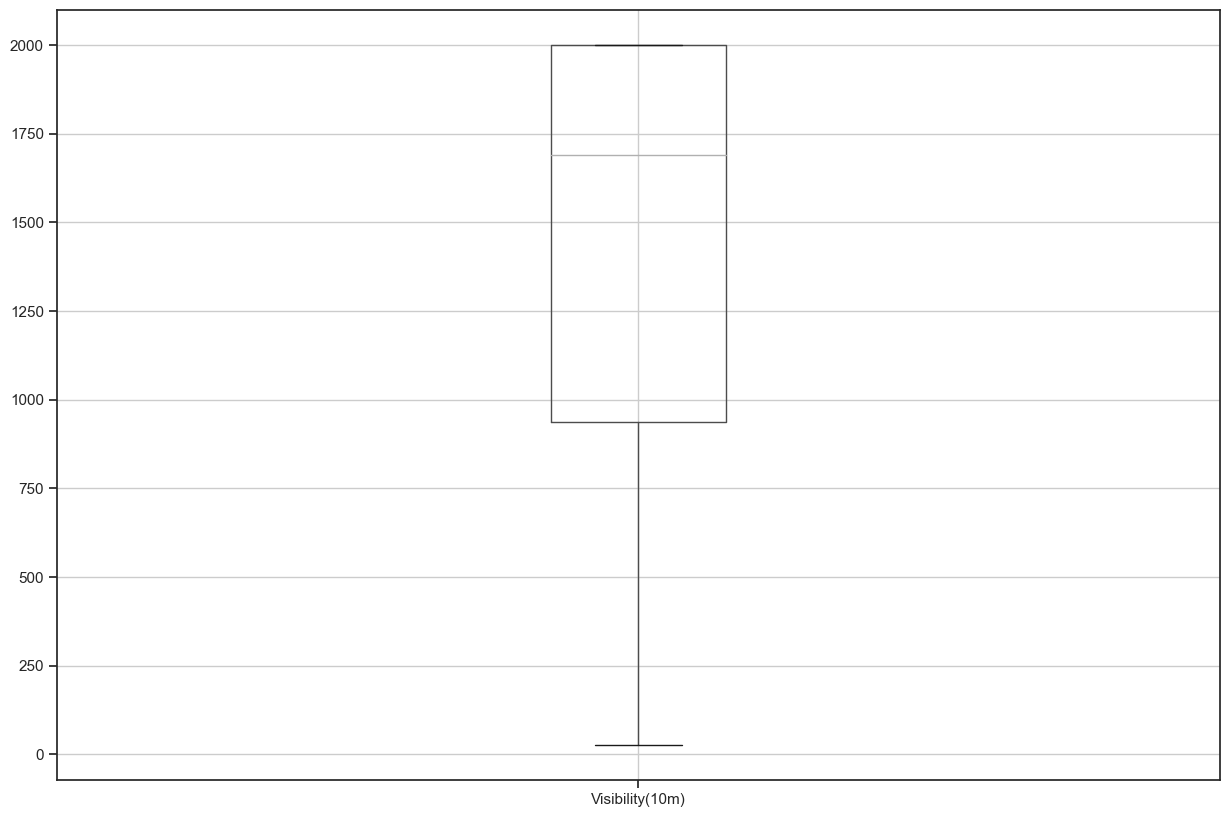

In [30]:
plt.figure(figsize= (15,10))

df.boxplot(column= "Visibility(10m)")

In [31]:
outliers, upper, lower = detect_outliers_IQR(df['Visibility(10m)'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))


number of outliers: 0
max outlier value: nan
min of outliers: nan
Percentage of outliers: 0.0


### Discussion:
****
There is so outlier in `Visibility`

## Dewpointtemperature

In [32]:
df_Dewpointtemperature_q_low = df["Dewpointtemperature(°C)"].quantile(0.02)
df_Dewpointtemperature_q_hi  = df["Dewpointtemperature(°C)"].quantile(0.99)

df_filtered = df[(df["Dewpointtemperature(°C)"] > df_Dewpointtemperature_q_hi) | 
                 (df["Dewpointtemperature(°C)"] < df_Dewpointtemperature_q_low)]
print(len(df_filtered)/ len(df) * 100)
df_filtered

3.0159668835008873


StationNumber        Date  CasualUser  RegisteredUser  \
613              14  26/12/2017       114.0             262   
615              16  26/12/2017        88.0             246   
616              17  26/12/2017       133.0             282   
617              18  26/12/2017       138.0             350   
633              10  27/12/2017       133.0             279   
...             ...         ...         ...             ...   
6121              2  13/08/2018        75.0             231   
6123              4  13/08/2018        76.0             196   
6124              5  13/08/2018        49.0             151   
6125              6  13/08/2018        72.0             230   
6186             19  15/08/2018       328.0             925   

      Newregistereduser  Temperature(°C)  Humidity(%)  Windspeed(m/s)  \
613                  10             -2.0           15             4.7   
615                   7             -1.9           17             5.0   
616                   9             -1.9           17             3.3   
617                  10             -3.6           20             3.7   
633                  10             -9.8           33             2.0   
...                 ...              ...          ...             ...   
6121                  5             28.2           88             0.2   
6123                  5             27.7           88             0.5   
6124                  4             27.1           91             0.9   
6125                  6             26.8           90             0.6   
6186                 21             32.8           63             2.3   

      Visibility(10m)  Dewpointtemperature(°C)  SolarRadiation(MJ/m2)  \
613              1970                    -25.2                   1.18   
615              2000                    -23.7                   0.93   
616              2000                    -23.7                   0.61   
617              2000                    -23.3                   0.23   
633              1997                    -23.0                   0.17   
...               ...                      ...                    ...   
6121              929                     26.0                   0.00   
6123              833                     25.5                   0.00   
6124              585                     25.4                   0.00   
6125              591                     25.0                   0.00   
6186             1546                     24.8                   0.89   

      Rainfall(mm)  Snowfall(cm) Seasons OperationDay  TotalUser  \
613            0.0           0.0  Winter          Yes      386.0   
615            0.0           0.0  Winter          Yes      341.0   
616            0.0           0.0  Winter          Yes      424.0   
617            0.0           0.0  Winter          Yes      498.0   
633            0.0           0.0  Winter          Yes      422.0   
...            ...           ...     ...          ...        ...   
6121           1.0           0.0  Summer          Yes      311.0   
6123           0.0           0.0  Summer          Yes      277.0   
6124           0.0           0.0  Summer          Yes      204.0   
6125           0.0           0.0  Summer          Yes      308.0   
6186           0.1           0.0  Summer          Yes     1274.0   

      CasualUserPercentage  RegisteredUserPercentage  \
613              29.533679                 67.875648   
615              25.806452                 72.140762   
616              31.367925                 66.509434   
617              27.710843                 70.281124   
633              31.516588                 66.113744   
...                    ...                       ...   
6121             24.115756                 74.276527   
6123             27.436823                 70.758123   
6124             24.019608                 74.019608   
6125             23.376623                 74.675325   
6186             25.745683                 72.605965   

     

### Discussion:
****
The `Dewpointtemperature` seem to have some influences on the number of user since when the number of `Dewpointtemperature` < 0 then the number of users are lower than the `Dewpointtemperature` is high.

## SolarRadiation

In [33]:
df_SolarRadiation_q_low = df["SolarRadiation(MJ/m2)"].quantile(0.02)
df_SolarRadiation_q_hi  = df["SolarRadiation(MJ/m2)"].quantile(0.99)

df_filtered = df[(df["SolarRadiation(MJ/m2)"] > df_SolarRadiation_q_hi) | 
                 (df["SolarRadiation(MJ/m2)"] < df_SolarRadiation_q_low)]
print(len(df_filtered)/ len(df) * 100)
df_filtered

0.9698403311649912


StationNumber                 Date  CasualUser  RegisteredUser  \
2989             14  2018-04-04 00:00:00       339.0             951   
3181             14  2018-12-04 00:00:00       440.0            1029   
3277             14           16/04/2018       370.0             973   
3325             14           18/04/2018       459.0             975   
3396             13           21/04/2018       420.0            1130   
...             ...                  ...         ...             ...   
6204             13           16/08/2018       242.0             668   
6205             14           16/08/2018       293.0             652   
6229             14           17/08/2018       339.0             820   
6230             15           17/08/2018       358.0             791   
6253             14           18/08/2018       364.0            1003   

      Newregistereduser  Temperature(°C)  Humidity(%)  Windspeed(m/s)  \
2989                 22             16.7           47             1.4   
3181                 44             18.1           18             5.1   
3277                 26             16.6           30             2.3   
3325                 32             17.7           16             2.8   
3396                 38             24.3           14             3.3   
...                 ...              ...          ...             ...   
6204                 17             34.5           44             2.2   
6205                 26             35.1           39             2.0   
6229                 30             31.3           30             2.1   
6230                 32             32.7           27             2.0   
6253                 30             31.1           30             1.5   

      Visibility(10m)  Dewpointtemperature(°C)  SolarRadiation(MJ/m2)  \
2989             2000                      5.3                   3.24   
3181             1939                     -6.6                   3.20   
3277             1876                     -1.0                   3.21   
3325             1824                     -8.4                   3.27   
3396             1701                     -4.9                   3.19   
...               ...                      ...                    ...   
6204             2000                     20.4                   3.19   
6205             2000                     19.0                   3.45   
6229             2000                     11.6                   3.30   
6230             1964                     11.2                   3.21   
6253             2000                     11.4                   3.24   

      Rainfall(mm)  Snowfall(cm) Seasons OperationDay  TotalUser  \
2989           0.0           0.0  Spring          Yes     1312.0   
3181           0.0           0.0  Spring          Yes     1513.0   
3277           0.0           0.0  Spring          Yes     1369.0   
3325           0.0           0.0  Spring          Yes     1466.0   
3396           0.0           0.0  Spring          Yes     1588.0   
...            ...           ...     ...          ...        ...   
6204           0.0           0.0  Summer          Yes      927.0   
6205           0.0           0.0  Summer          Yes      971.0   
6229           0.0           0.0  Summer          Yes     1189.0   
6230           0.0           0.0  Summer          Yes     1181.0   
6253           0.0           0.0  Summer          Yes     1397.0   

      CasualUserPercentage  RegisteredUserPercentage  \
2989             25.838415                 72.484756   
3181             29.081295                 68.010575   
3277             27.027027                 71.073776   
3325             31.309686                 66.507503   
3396             26.448363                 71.158690   
...                    ...                       ...   
6204             26.105717                 72.060410   
6205             30.175077                 67.147271   
6229             28.511354                 68.965517   
6230      

### Discussion:
****
There is no clear relationship between the `SolarRadiation` and number of users

## Rainfall

In [34]:
df_SolarRadiation_q_low = df["Rainfall(mm)"].quantile(0.02)
df_SolarRadiation_q_hi  = df["Rainfall(mm)"].quantile(0.99)

df_filtered = df[(df["Rainfall(mm)"] > df_SolarRadiation_q_hi) | 
                 (df["Rainfall(mm)"] < df_SolarRadiation_q_low)]
print(len(df_filtered)/ len(df) * 100)
df_filtered

0.8988764044943821


StationNumber                 Date  CasualUser  RegisteredUser  \
561              10           24/12/2017         4.0               3   
564              13           24/12/2017         6.0               4   
2151             16           28/02/2018         4.0               7   
2154             19           28/02/2018         2.0              11   
2157             22           28/02/2018         3.0              10   
...             ...                  ...         ...             ...   
8220             13  2018-08-11 00:00:00         0.0              17   
8223             16  2018-08-11 00:00:00        25.0              56   
8226             19  2018-08-11 00:00:00         7.0              40   
8229             22  2018-08-11 00:00:00         6.0              21   
8601             10           24/11/2018         4.0              24   

      Newregistereduser  Temperature(°C)  Humidity(%)  Windspeed(m/s)  \
561                   0              4.6           94             0.9   
564                   0              4.1           91             0.8   
2151                  0              4.8           87             2.9   
2154                  0              3.6           90             2.1   
2157                  0              2.4           95             2.5   
...                 ...              ...          ...             ...   
8220                  0             11.4           95             2.5   
8223                  1             11.4           96             2.0   
8226                  0             12.9           97             0.0   
8229                  0             14.0           96             4.1   
8601                  0              0.3           97             3.0   

      Visibility(10m)  Dewpointtemperature(°C)  SolarRadiation(MJ/m2)  \
561                90                      3.7                   0.00   
564               404                      2.7                   0.07   
2151              312                      2.8                   0.08   
2154              845                      2.1                   0.00   
2157             1349                      1.6                   0.00   
...               ...                      ...                    ...   
8220              792                     10.6                   0.44   
8223              910                     10.7                   0.07   
8226              406                     12.4                   0.00   
8229              292                     13.3                   0.00   
8601               34                     -0.1                   0.00   

      Rainfall(mm)  Snowfall(cm) Seasons OperationDay  TotalUser  \
561            6.4           0.0  Winter          Yes        7.0   
564            9.5           0.0  Winter          Yes       10.0   
2151           4.5           0.0  Winter          Yes       11.0   
2154           9.5           0.0  Winter          Yes       13.0   
2157           9.0           0.0  Winter          Yes       13.0   
...            ...           ...     ...          ...        ...   
8220           5.5           0.0  Autumn          Yes       17.0   
8223           9.5           0.0  Autumn          Yes       82.0   
8226           9.0           0.0  Autumn          Yes       47.0   
8229          18.0           0.0  Autumn          Yes       27.0   
8601           9.1           7.1  Autumn          Yes       28.0   

      CasualUserPercentage  RegisteredUserPercentage  \
561              57.142857                 42.857143   
564              60.000000                 40.000000   
2151             36.363636                 63.636364   
2154             15.384615                 84.615385   
2157             23.076923                 76.923077   
...                    ...                       ...   
8220              0.000000                100.000000   
8223             30.487805                 68.292683   
8226             14.893617                 85.106383   
8229      

### Discussion:
****
There is no clear relationship between the `Rainfall` and number of users

## Snowfall

In [35]:
df_SolarRadiation_q_low = df["Snowfall(cm)"].quantile(0.02)
df_SolarRadiation_q_hi  = df["Snowfall(cm)"].quantile(0.99)

df_filtered = df[(df["Snowfall(cm)"] > df_SolarRadiation_q_hi) | 
                 (df["Snowfall(cm)"] < df_SolarRadiation_q_low)]
print(len(df_filtered)/ len(df) * 100)
df_filtered

0.9225310467179184


StationNumber                 Date  CasualUser  RegisteredUser  \
222               7  2017-10-12 00:00:00    1.956522               9   
223               8  2017-10-12 00:00:00    4.878049              20   
224               9  2017-10-12 00:00:00    8.974359              35   
225              10  2017-10-12 00:00:00    9.117647              31   
226              11  2017-10-12 00:00:00    5.937500              19   
...             ...                  ...         ...             ...   
8616              1           25/11/2018  202.000000             420   
8617              2           25/11/2018  164.000000             370   
8618              3           25/11/2018   90.000000             285   
8619              4           25/11/2018   80.000000             184   
8620              5           25/11/2018   41.000000             138   

      Newregistereduser  Temperature(°C)  Humidity(%)  Windspeed(m/s)  \
222                   5             -0.5           90             0.9   
223                   1             -0.4           92             1.1   
224                   2             -0.2           90             1.2   
225                   4              0.2           90             1.0   
226                   3              0.5           91             0.4   
...                 ...              ...          ...             ...   
8616                 13              2.7           86             1.2   
8617                 16              2.7           86             1.0   
8618                  9              2.8           86             0.8   
8619                  8              2.6           88             0.9   
8620                  2              2.4           89             0.7   

      Visibility(10m)  Dewpointtemperature(°C)  SolarRadiation(MJ/m2)  \
222                91                     -1.9                    0.0   
223               121                     -1.5                    0.0   
224               378                     -1.6                    0.0   
225               305                     -1.2                    0.0   
226               143                     -0.8                    0.0   
...               ...                      ...                    ...   
8616              422                      0.5                    0.0   
8617              460                      0.5                    0.0   
8618              402                      0.6                    0.0   
8619              319                      0.8                    0.0   
8620              321                      0.7                    0.0   

      Rainfall(mm)  Snowfall(cm) Seasons OperationDay   TotalUser  \
222            2.5           2.7  Winter          Yes   15.956522   
223            0.0           4.0  Winter          Yes   25.878049   
224            0.0           4.1  Winter          Yes   45.974359   
225            1.6           4.3  Winter          Yes   44.117647   
226            0.0           4.3  Winter          Yes   27.937500   
...            ...           ...     ...          ...         ...   
8616           0.0           3.0  Autumn          Yes  635.000000   
8617           0.0           2.9  Autumn          Yes  550.000000   
8618           0.0           2.9  Autumn          Yes  384.000000   
8619           0.0           2.8  Autumn          Yes  272.000000   
8620           0.0           2.6  Autumn          Yes  181.000000   

      CasualUserPercentage  RegisteredUserPercentage  \
222              12.261580                 56.403270   
223              18.850141                 77.285580   
224              19.520357                 76.129392   
225              20.666667                 70.266667   
226              21.252796                 68.008949   
...                    ...                       ...   
8616             31.811024                 66.141732   
8617             29.818182                 67.272727   
8618             23.437500                 74.218750  

### Discussion:
****
There is no clear relationship between the `Snowfall` and number of users

<a id="3.2"></a>
## 3.2 Analysis for Research Questions
****

<a id="3.2.1"></a>
### 3.2.1 RQ1. Which weather factor(s) most likely affect the number of casual e-scooter rentees?
****

### Correlation between `Temperature` and `Casual User`?
*****
**Hypotheses:**
> * **Null hypothesis ($H_0$)** : `Temperature` and `CasualUser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Temperature` and `CasualUser`  are correlated.

**Significance level** = 0.05

In [36]:
pearsonr(df['CasualUser'], df['Temperature(°C)'])

PearsonRResult(statistic=0.5584308561855573, pvalue=0.0)

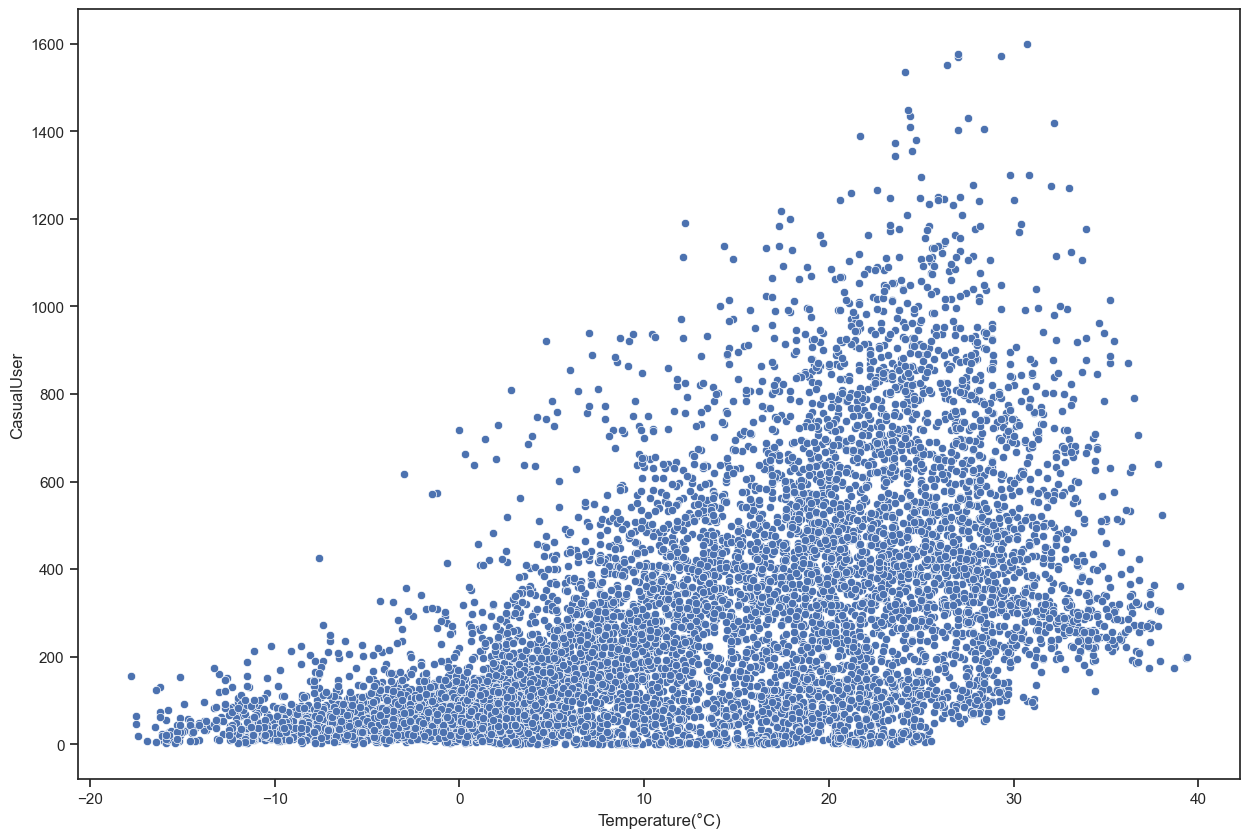

In [37]:
sns.scatterplot(x="Temperature(°C)", y="CasualUser", data=df);

### Discussion:
****
`Temperature` and `CasualUser` have a strong positive correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therfore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is high: 0.536.

### Correlation between `Humidity` and `CasualUser`?
*****
**Hypotheses:**
> * **Null hypothesis ($H_0$)** : `Humidity` and `CasualUser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Humidity` and `CasualUser` are correlated.

**Significance level** = 0.05

In [38]:
pearsonr(df['CasualUser'], df['Humidity(%)'])

PearsonRResult(statistic=-0.19390597551946215, pvalue=2.008774066879783e-72)

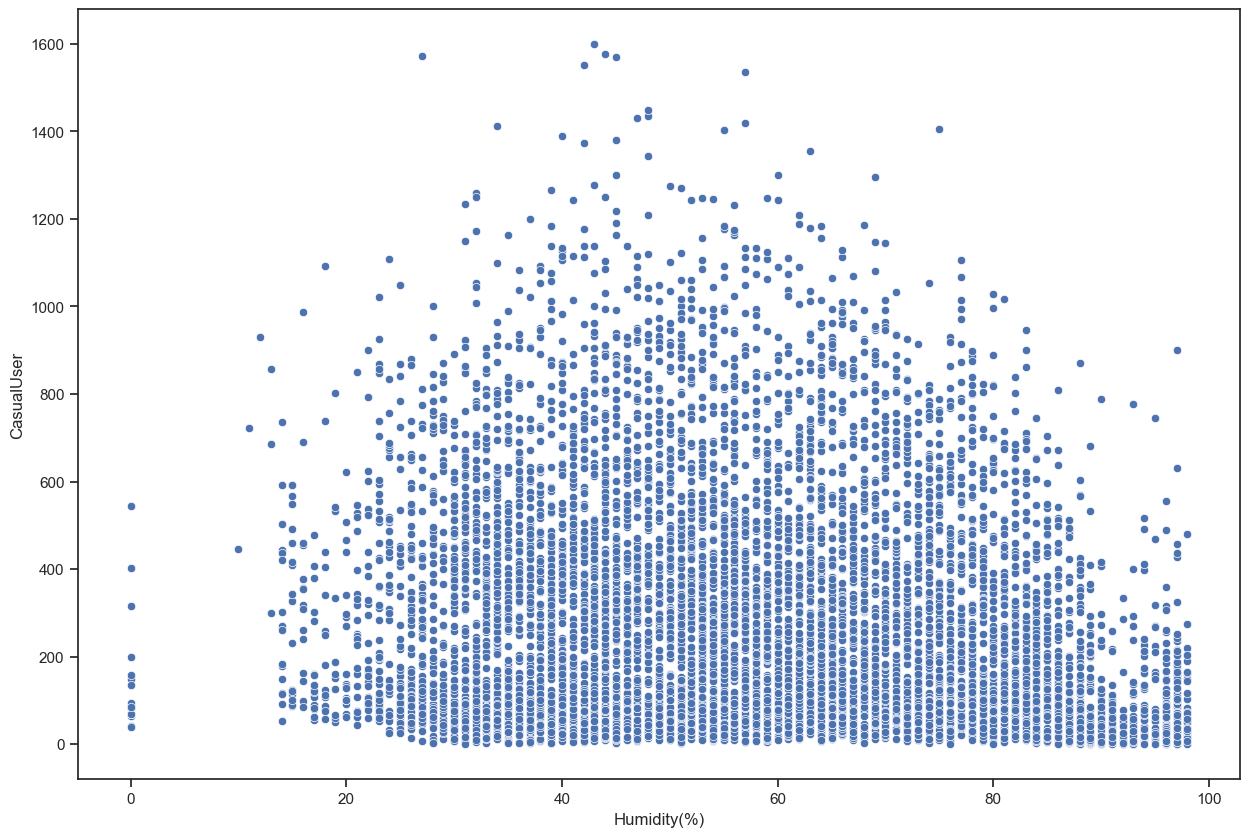

In [39]:
sns.scatterplot(x="Humidity(%)", y="CasualUser", data=df);

### Discussion:
****
`Humidity` and `CasualUser` have a weak negative correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is low: -0.192.

### Correlation between `Windspeed` and `CasualUser`?
*****
**Hypotheses**:
> * **Null hypothesis ($H_0$)** : `Windspeed` and `CasualUser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Windspeed` and `CasualUser` are correlated.

**Significance level** = 0.05

In [40]:
pearsonr(df['CasualUser'], df['Windspeed(m/s)'])

PearsonRResult(statistic=0.12125759648705695, pvalue=4.5939491518092596e-29)

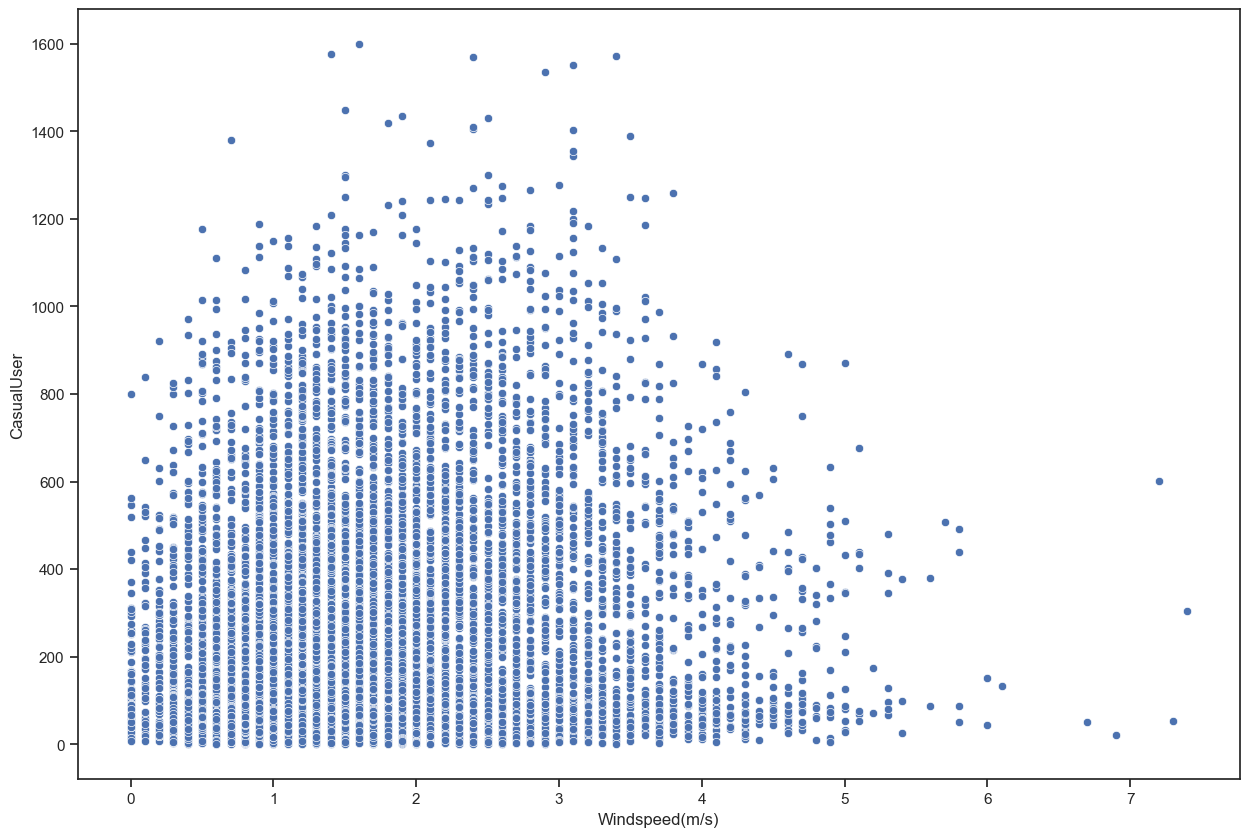

In [41]:
sns.scatterplot(x="Windspeed(m/s)", y="CasualUser", data=df);

### Discussion:
****
`Windspeed` and `CasualUser` have a weak positive correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is low: 0.118.

### Correlation between `Visibility` and `CasualUser`?
*****
**Hypotheses:**:
> * **Null hypothesis ($H_0$)** : `Visibility` and `CasualUser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Visibility` and `CasualUser` are correlated.

**Significance level** = 0.05

In [42]:
pearsonr(df['CasualUser'], df['Visibility(10m)'])

PearsonRResult(statistic=0.20146655205038708, pvalue=3.769529408988438e-78)

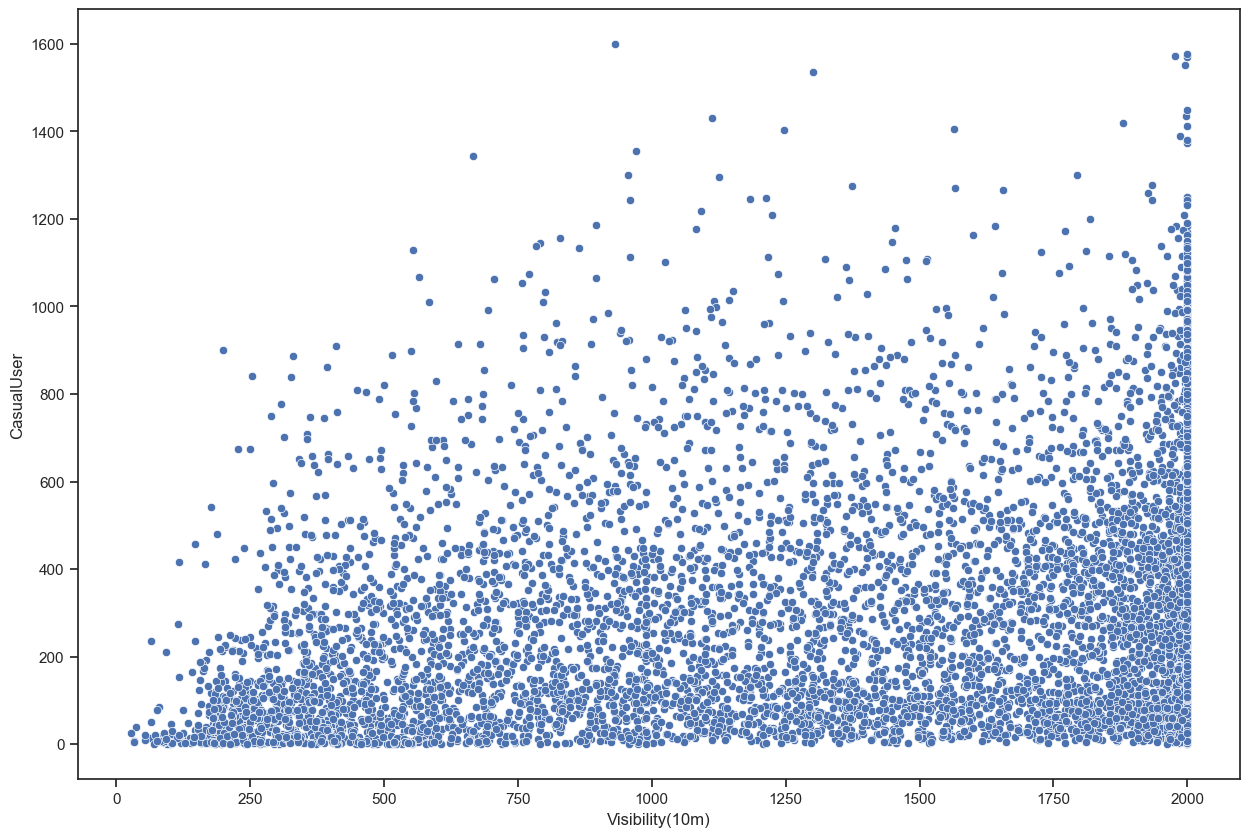

In [43]:
sns.scatterplot(x="Visibility(10m)", y="CasualUser", data=df);

### Discussion:
****
`Visibility` and `CasualUser` have a weak positive correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is low: 0.190.

### Correlation between `Dewpointtemperature` and `CasualUser`?
*****
**Hypotheses:**:
> * **Null hypothesis ($H_0$)** : `DewPointTemperature` and `CasualUser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `DewPointTemperature` and `CasualUser` are correlated.

**Significance level** = 0.05

In [44]:
pearsonr(df['CasualUser'], df['Dewpointtemperature(°C)'])

PearsonRResult(statistic=0.399231765751075, pvalue=4.407e-321)

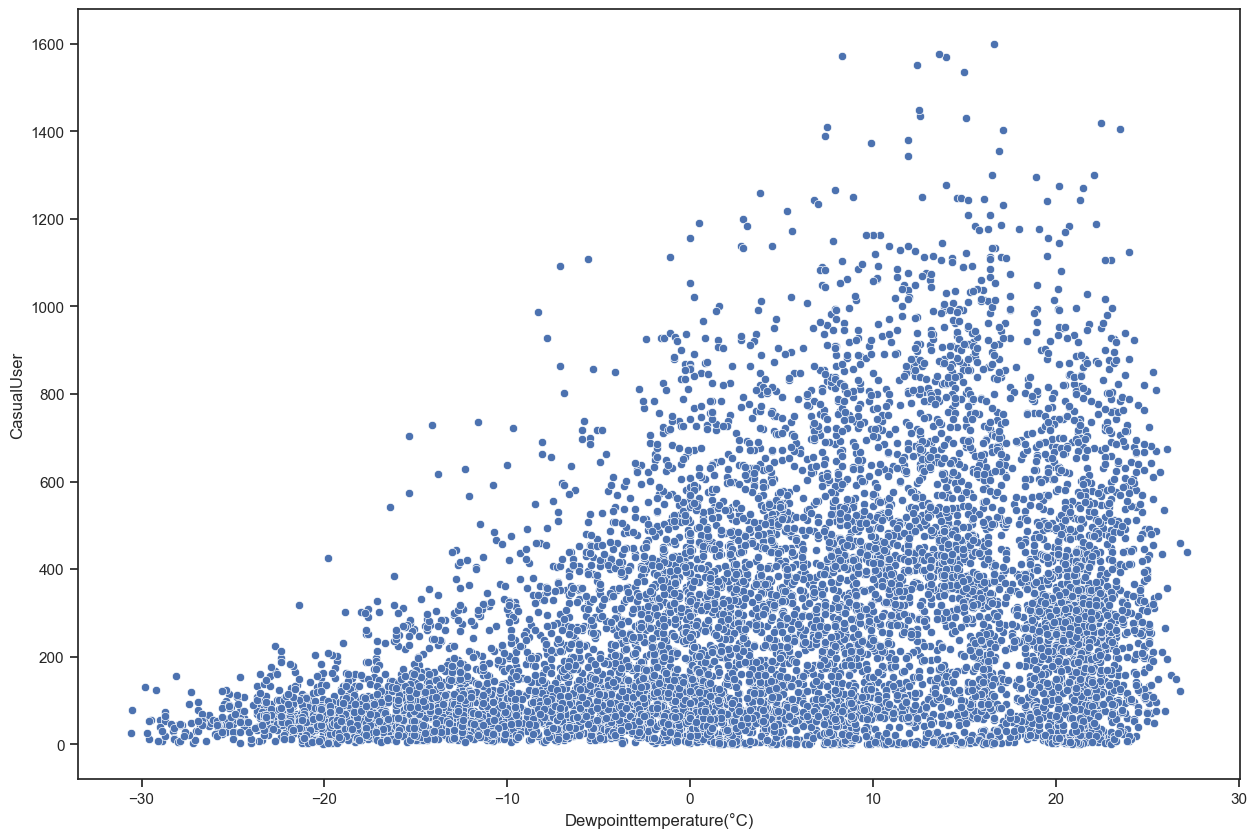

In [45]:
sns.scatterplot(x="Dewpointtemperature(°C)", y="CasualUser", data=df);

### Discussion:
****
`Dewpointtemperature` and `CasualUser` have a moderate positive correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is medium: 0.380.

### Correlation between `SolarRadiation` and `CasualUser`?
*****
**Hypotheses:**:
> * **Null hypothesis ($H_0$)** : `SolarRadiation` and `CasualUser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `SolarRadiation`and `CasualUser` are correlated.

**Significance level** = 0.05

In [46]:
pearsonr(df['CasualUser'], df['SolarRadiation(MJ/m2)'])

PearsonRResult(statistic=0.2699443451261877, pvalue=4.2314268081043616e-141)

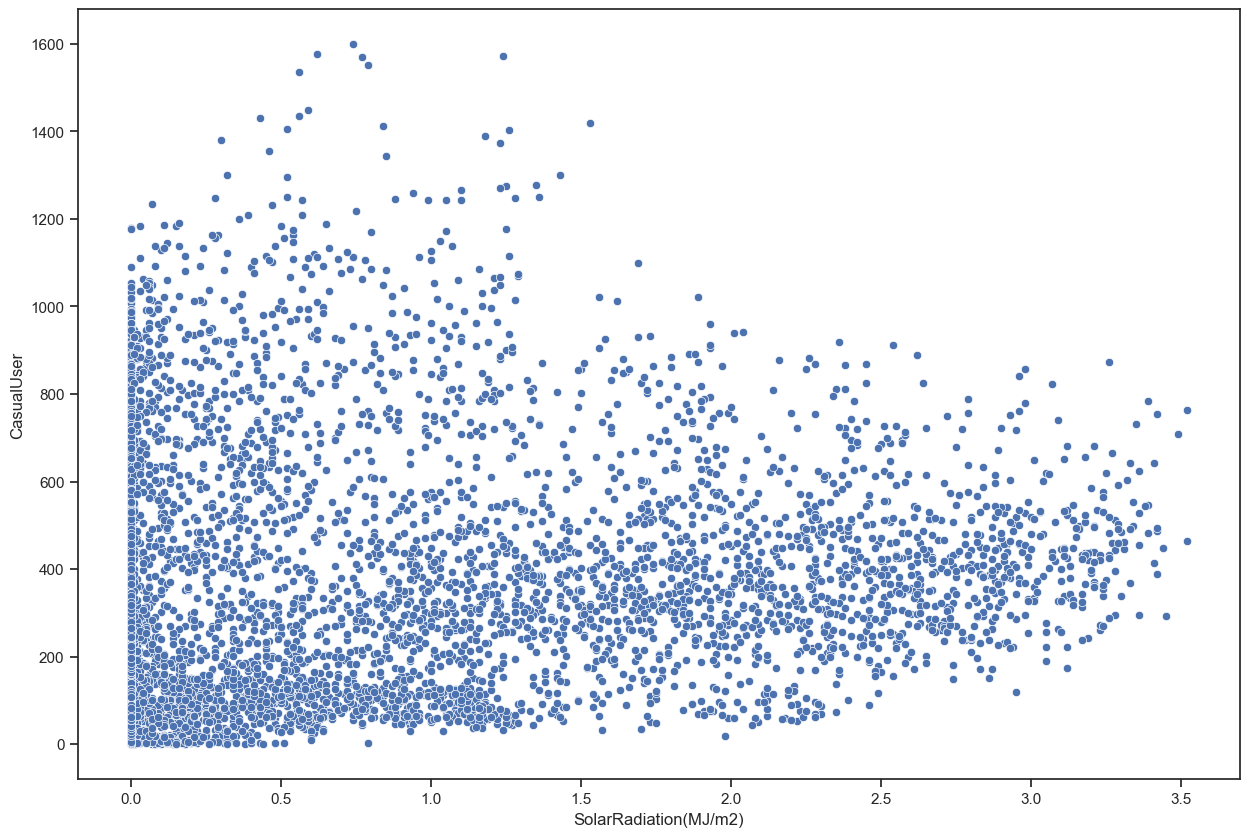

In [47]:
sns.scatterplot(x="SolarRadiation(MJ/m2)", y="CasualUser", data=df);

### Discussion:
****
`SolarRadiation` and `CasualUser` have a weak positive correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is low: 0.259.


### Correlation between `Rainfall` and `CasualUser`?
*****
**Hypotheses:**:
> * **Null hypothesis ($H_0$)** : `Rainfall` and `CasualUser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Rainfall` and `CasualUser` are correlated.

**Significance level** = 0.05

In [48]:
pearsonr(df['CasualUser'], df['Rainfall(mm)'])

PearsonRResult(statistic=-0.12502332040215988, pvalue=8.32825421676256e-31)

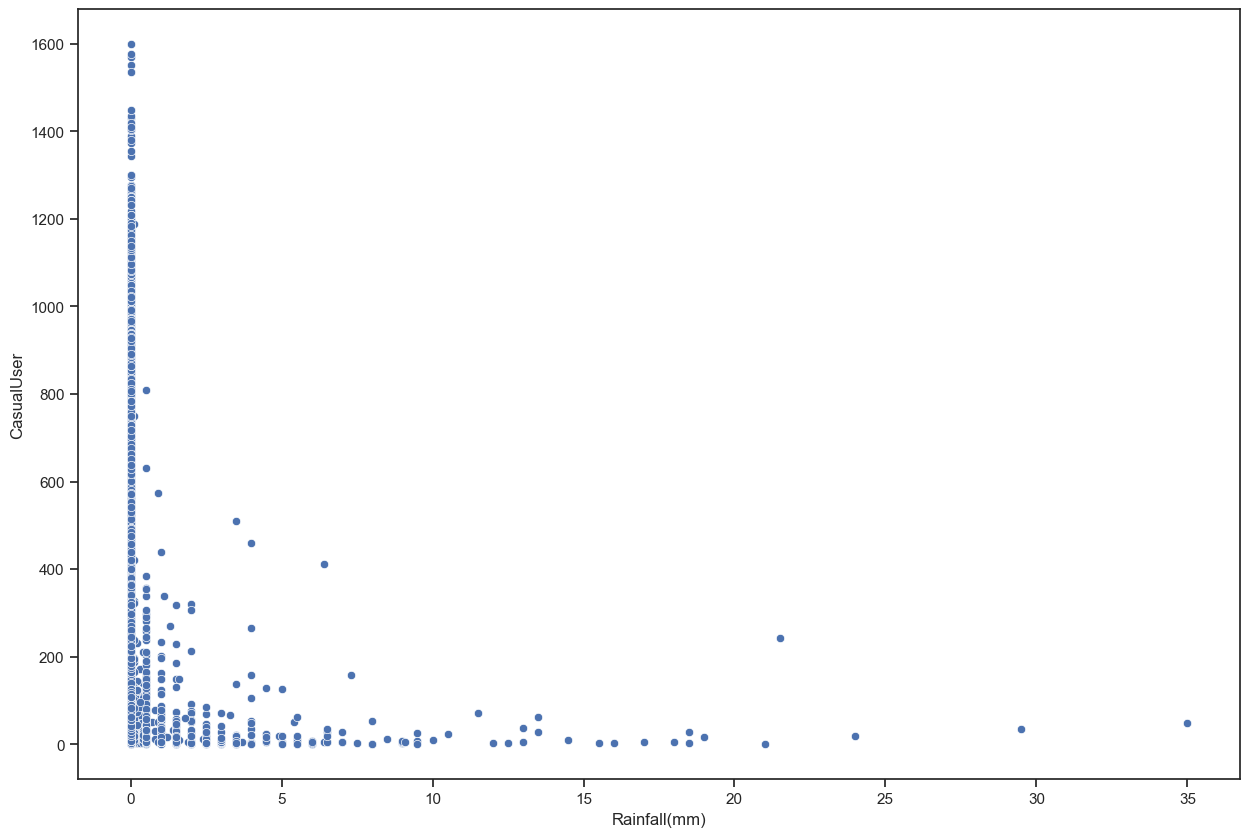

In [49]:
sns.scatterplot(x="Rainfall(mm)", y="CasualUser", data=df);

### Discussion:
****
`Rainfall` and `CasualUser` have a weak negative correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is low: -0.120.

From the scatterplot and the Pearson correlation test, it looks like the number of `CasualUser` decreases as `Rainfall` increases, and `CasualUser`s were more likely to rent e-scooters when there is no rain. Hence, an independent t-test is carried out to test the following hypotheses:
> * **Null hypothesis ($H_0$)** : The number of `CasualUser` on rainy days is NOT less than the number of `CasualUser` on days without rain.
> * **Alternative hypothesis ($H_1$)**: The number of `CasualUser` on rainy days is less than the number of `CasualUser` on days without rain.

**Significance level** = 0.05

A Levene's test must be conducted before the t-test to check the homogeneity of variance of the two samples: `CasualUser` on rainy days and `CasualUser` on days without rain.

In [50]:
stats.levene(df['CasualUser'][df['Rainfall(mm)'] != 0],
             df['CasualUser'][df['Rainfall(mm)'] == 0]
            )

LeveneResult(statistic=344.87876786803474, pvalue=1.731655175945101e-75)

The p-value from the Levene's test is less than the significance level (0.05), hence the test yields significant, which means that the two samples do not have equal variance.
Hence, the independent t-test must not assume equal variance between groups, and the Welch's t-test is conducted:

In [51]:
stats.ttest_ind(df['CasualUser'][df['Rainfall(mm)'] != 0], 
                df['CasualUser'][df['Rainfall(mm)'] == 0],
                equal_var=False,
                alternative='less')

Ttest_indResult(statistic=-41.90156606324153, pvalue=1.7836954816560604e-219)

### Discussion:
****
The number of `CasualUser` who rented e-scooter is higher when there is no rain on a given day because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***. The number of `CasualUser` on rainy days is less than the number of `CasualUser` on days without rain is True.


### Correlation between `Snowfall` and `CasualUser`?
*****
**Hypotheses:**:
> * **Null hypothesis ($H_0$)** : `Snowfall` and `CasualUser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Snowfall` and `CasualUser` are correlated.

**Significance level** = 0.05

In [52]:
pearsonr(df['CasualUser'], df['Snowfall(cm)'])

PearsonRResult(statistic=-0.14736611307636494, pvalue=2.9268938347653546e-42)

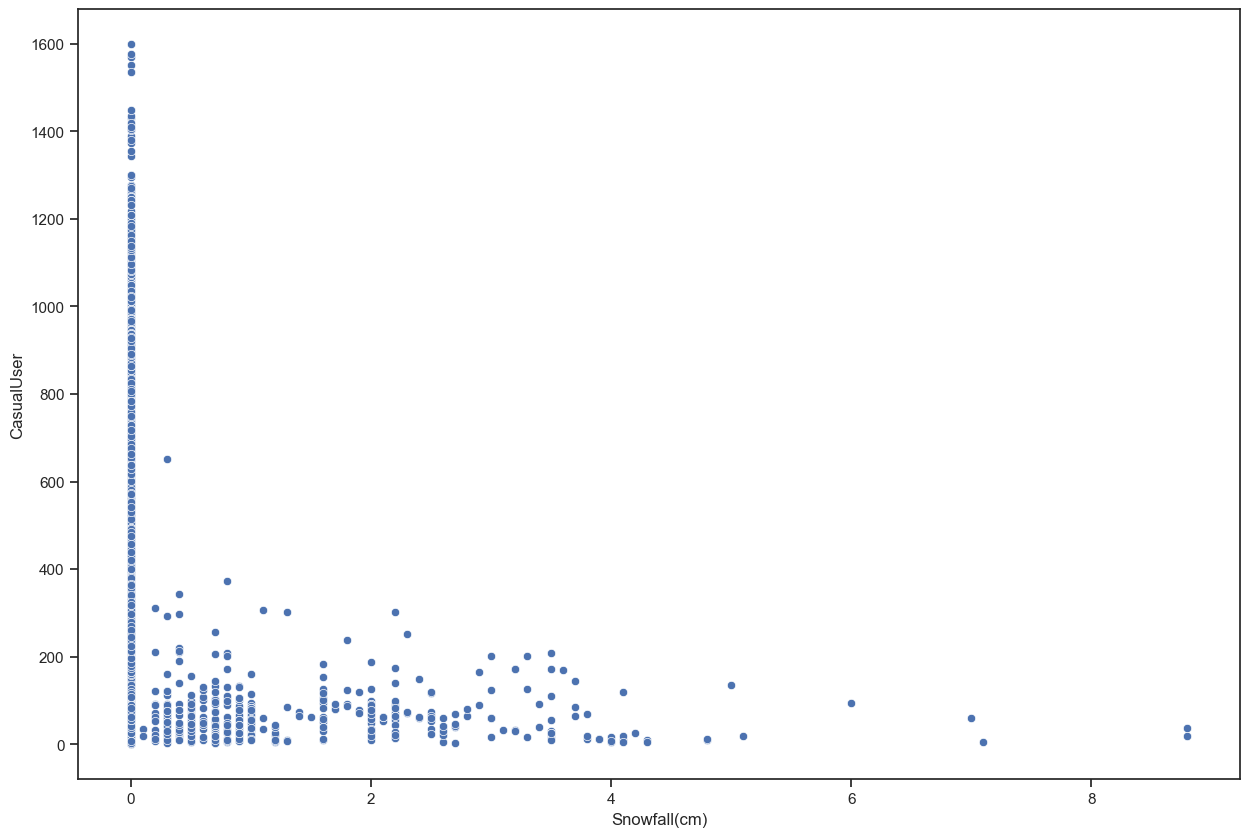

In [53]:
sns.scatterplot(x="Snowfall(cm)", y="CasualUser", data=df);

### Discussion:
****
`Snowfall` and `CasualUser` have a weak negative correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is low: -0.138.

From the scatterplot and the Pearson correlation test, it looks like the number of `CasualUser` decreases as `Snowfall` increases, and `CasualUser`s were more likely to rent e-scooters when there is no snow. Hence, an independent t-test is carried out to test the following hypotheses:
> * **Null hypothesis ($H_0$)** : The number of `CasualUser` on snowy days is NOT less than the number of `CasualUser` on days without snow.
> * **Alternative hypothesis ($H_1$)**: The number of `CasualUser` on snowy days is less than the number of `CasualUser` on days without snow.

**Significance level** = 0.05

A Levene's test must be conducted before the t-test to check the homogeneity of variance of the two samples: `CasualUser` on snowy days and `CasualUser` on days without snow.

In [54]:
stats.levene(df['CasualUser'][df['Snowfall(cm)'] != 0],
             df['CasualUser'][df['Snowfall(cm)'] == 0]
            )

LeveneResult(statistic=359.2052001588601, pvalue=1.751707738361622e-78)

The p-value from the Levene's test is less than the significance level (0.05), hence the test yields significant, which means that the two samples do not have equal variance.
Hence, the independent t-test must not assume equal variance between groups, and the Welch's t-test is conducted:

In [55]:
stats.ttest_ind(df['CasualUser'][df['Snowfall(cm)'] != 0], 
                df['CasualUser'][df['Snowfall(cm)'] == 0],
                equal_var=False,
                alternative='less')

Ttest_indResult(statistic=-54.18959146268522, pvalue=0.0)

### Discussion:
****
The number of `CasualUser` who rented e-scooter is higher when there is no snow on a given day because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***. The number of `CasualUser` on snowy days is less than the number of `CasualUser` on days without snow is True.


<a id="3.2.2"></a>
### 3.2.2 RQ2: Which weather factor(s) most likely affect the number of registered e-scooter rentees?
****

### Correlation between `Temperature` and `RegisteredUser`?
*****
**Hypotheses:**
> * **Null hypothesis ($H_0$)** : `Temperature` and `RegisteredUser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Temperature` and `RegisteredUser` are correlated.

**Significance level** = 0.05

In [56]:
pearsonr(df['RegisteredUser'], df['Temperature(°C)'])

PearsonRResult(statistic=0.5623669282530018, pvalue=0.0)

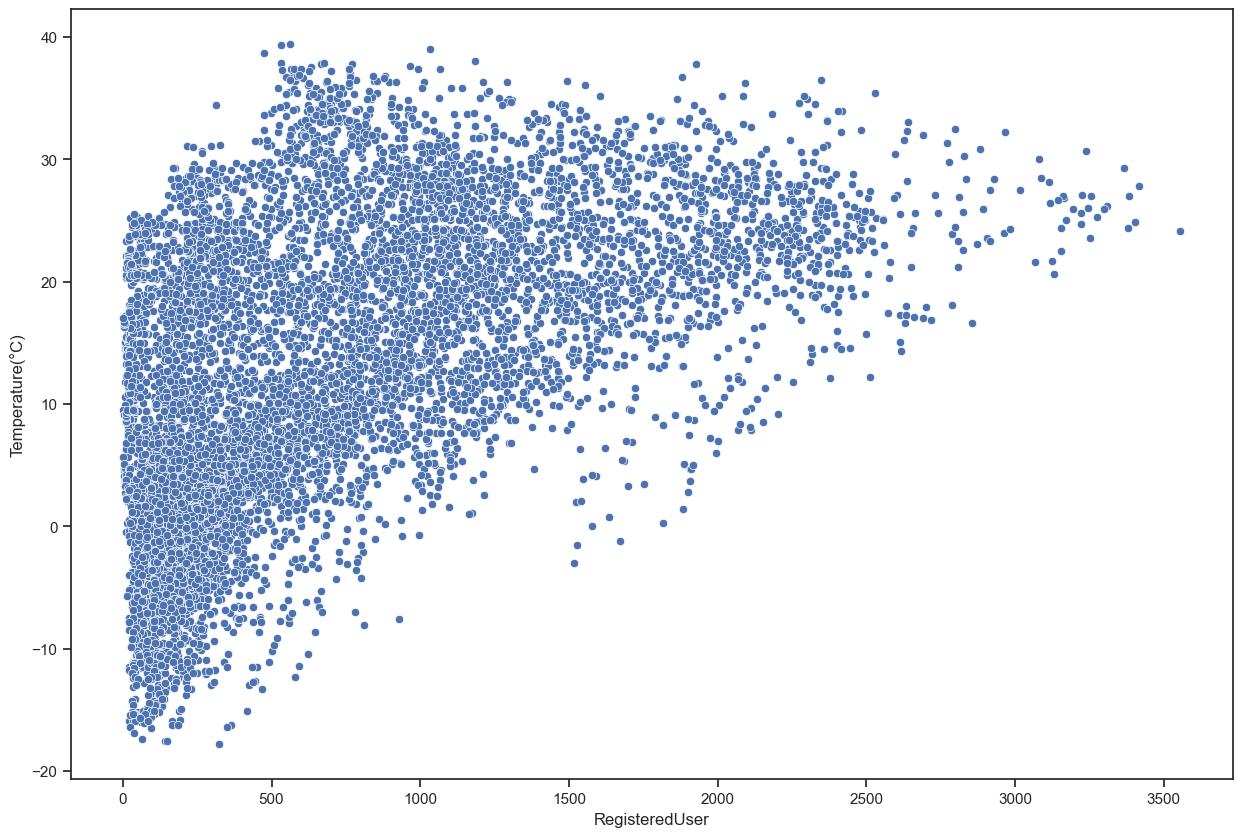

In [57]:
sns.scatterplot(x="RegisteredUser", y="Temperature(°C)", data=df);

### Discussion:
****
`Temperature` and `RegisteredUser` have a strong positive correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is high: 0.538.

### Correlation between `Humidity` and `RegisteredUser`?
*****
**Hypotheses:**
> * **Null hypothesis ($H_0$)** : `Humidity` and `RegisteredUser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Humidity` and `RegisteredUser` are correlated.

**Significance level** = 0.05

In [58]:
pearsonr(df['RegisteredUser'], df['Humidity(%)'])

PearsonRResult(statistic=-0.20162849303639568, pvalue=2.82518449937193e-78)

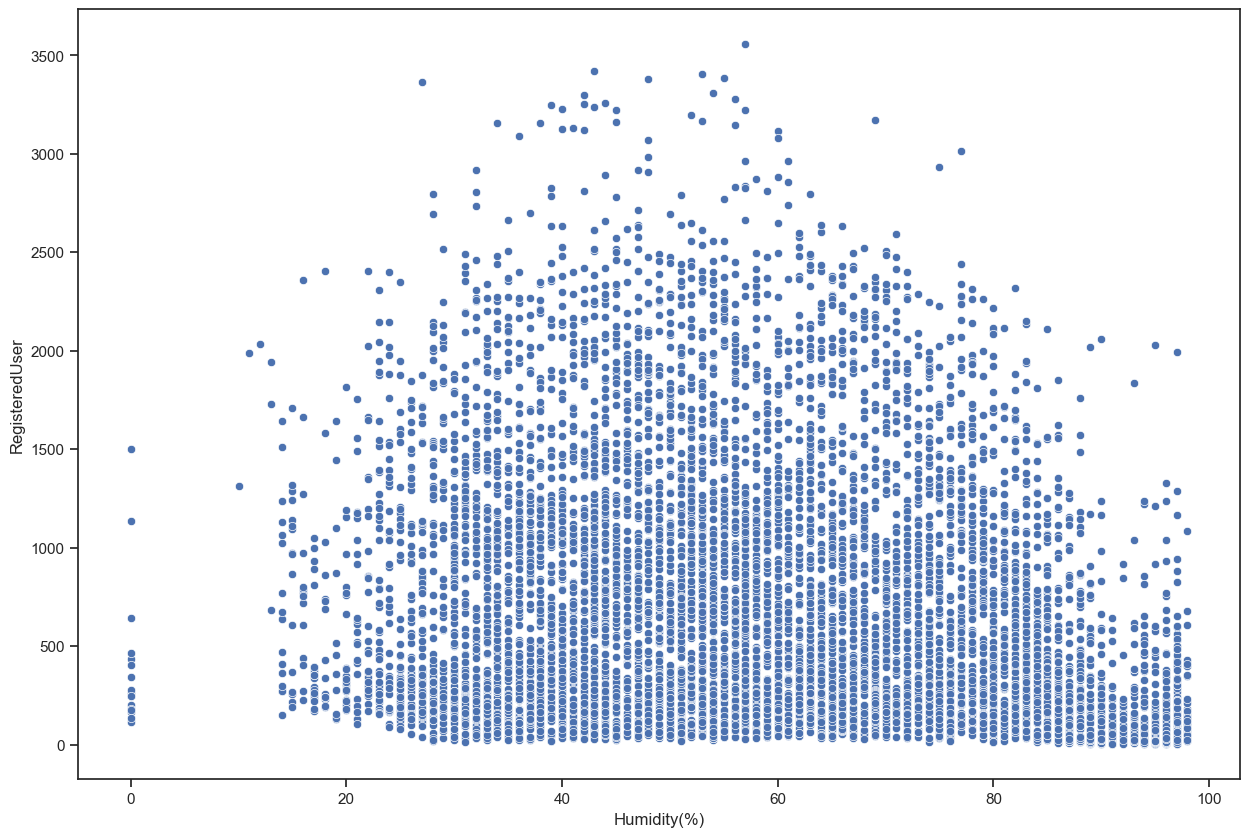

In [59]:
sns.scatterplot(x="Humidity(%)", y="RegisteredUser", data=df);

### Discussion:
****
`Humidity` and `RegisteredUser` have a weak negative correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is low: -0.199.

### Correlation between `Windspeed` and `RegisteredUser`?
*****
**Hypotheses:**
> * **Null hypothesis ($H_0$)** : `Windspeed` and `RegisteredUser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Windspeed` and `RegisteredUser` are correlated.

**Significance level** = 0.05

In [60]:
pearsonr(df['RegisteredUser'], df['Windspeed(m/s)'])

PearsonRResult(statistic=0.12464864176444868, pvalue=1.2481477161280213e-30)

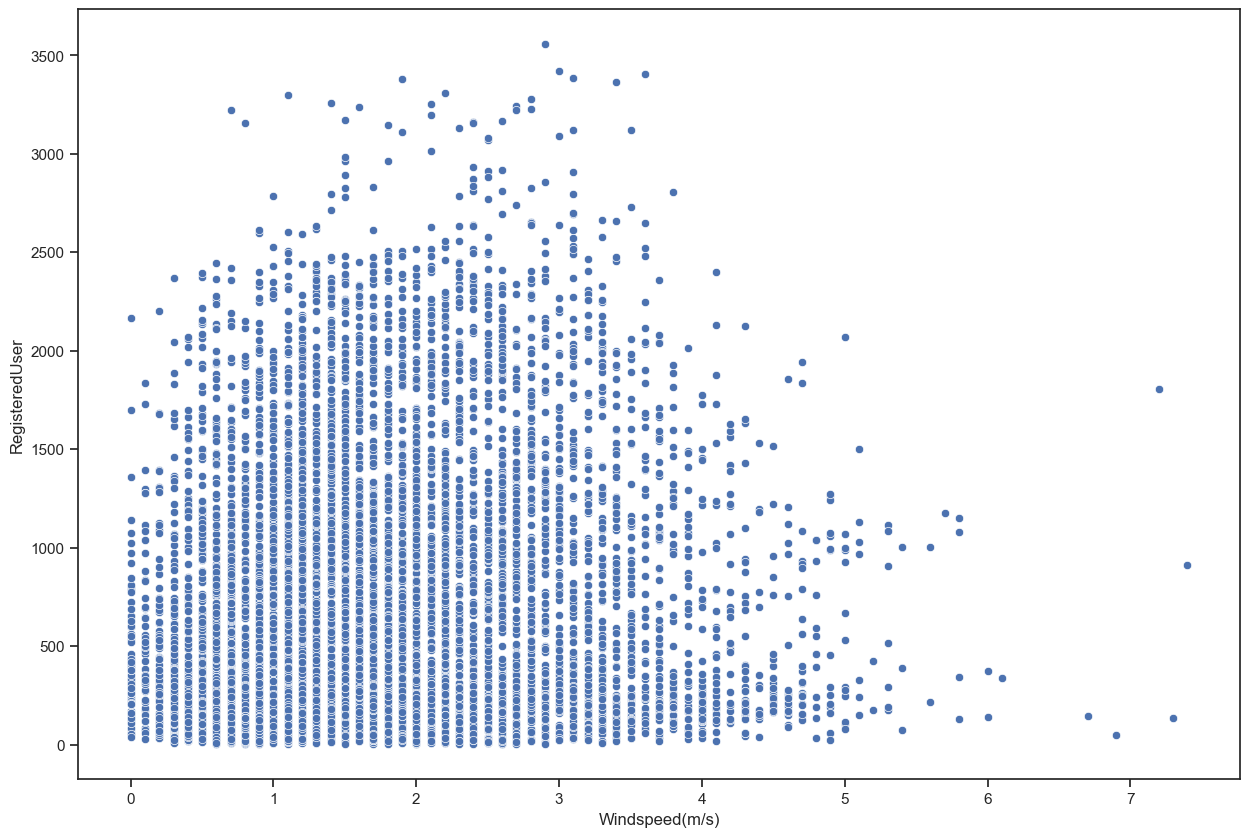

In [61]:
sns.scatterplot(x="Windspeed(m/s)", y="RegisteredUser", data=df);

### Discussion:
****
`Windspeed` and `RegisteredUser` have a weak positive correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is low: 0.121.

### Correlation between `Visibility` and `RegisteredUser`?
*****
**Hypotheses:**
> * **Null hypothesis ($H_0$)** : `Visibility` and `RegisteredUser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Visibility` and `RegisteredUser` are correlated.

**Significance level** = 0.05

In [62]:
pearsonr(df['RegisteredUser'], df['Visibility(10m)'])

PearsonRResult(statistic=0.21191623132799287, pvalue=1.867673110372952e-86)

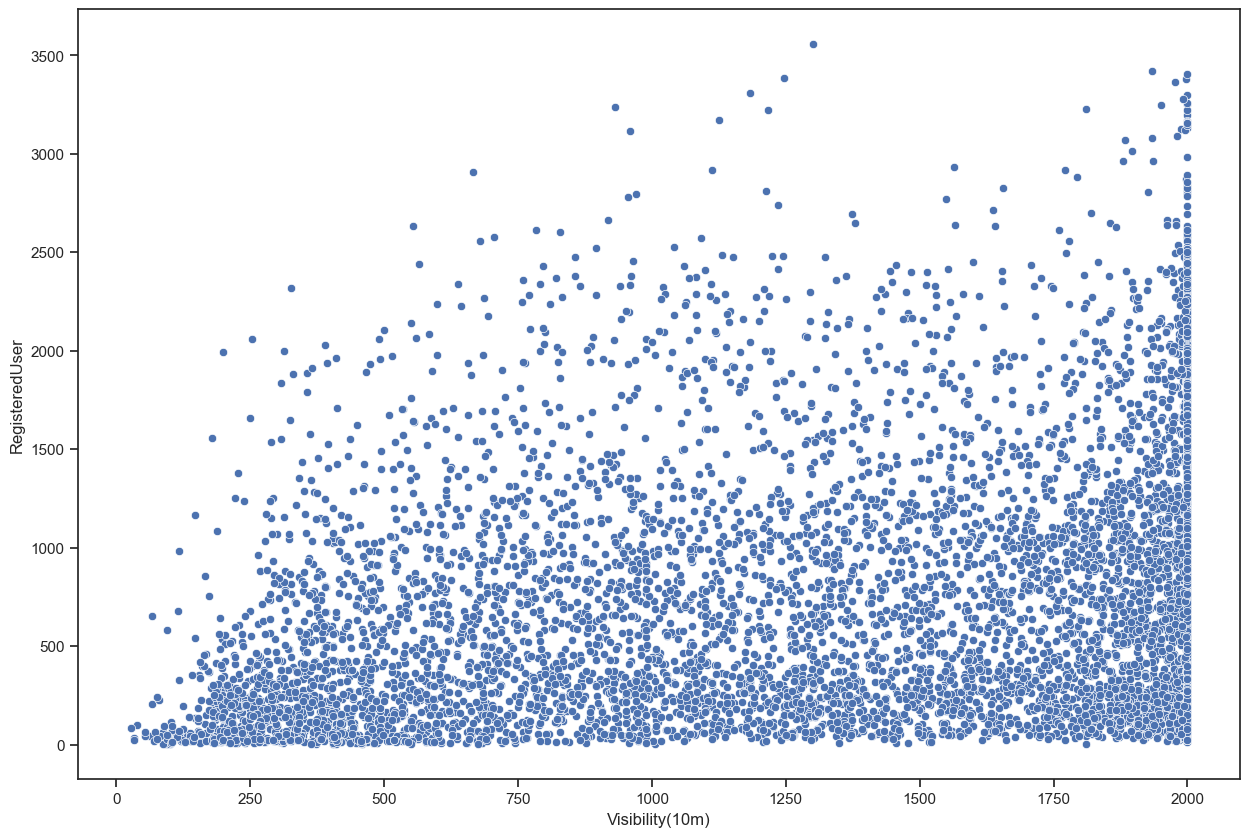

In [63]:
sns.scatterplot(x="Visibility(10m)", y="RegisteredUser", data=df);

### Discussion:
****
`Visibility` and `RegisteredUser` have a weak positive correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is low: 0.199.

### Correlation between `Dewpointtemperature` and `RegisteredUser`?
*****
**Hypotheses:**
> * **Null hypothesis ($H_0$)** : `Dewppointtemperature` and `RegisteredUser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Dewpointtemperature` and `RegisteredUser` are correlated.

**Significance level** = 0.05

In [64]:
pearsonr(df['RegisteredUser'], df['Dewpointtemperature(°C)'])

PearsonRResult(statistic=0.39988386554725397, pvalue=3.16e-322)

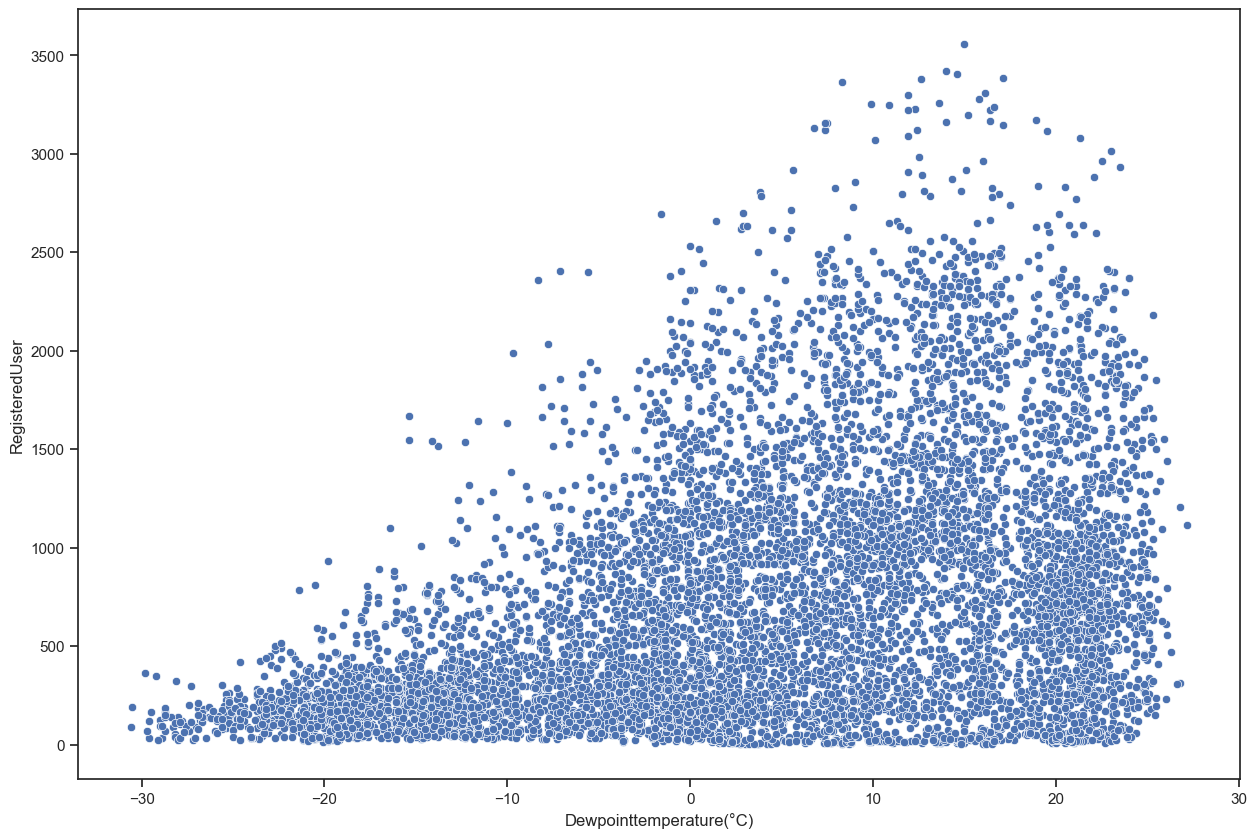

In [65]:
sns.scatterplot(x="Dewpointtemperature(°C)", y="RegisteredUser", data=df);

### Discussion:
****
`Dewpointtemperature` and `RegisteredUser` have a moderate positive correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is medium: 0.379.

### Correlation between `SolarRadiation` and `RegisteredUser`?
*****
**Hypotheses:**
> * **Null hypothesis ($H_0$)** : `SolarRadiation` and `RegisteredUser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `SolarRadiation` and `RegisteredUser` are correlated.

**Significance level** = 0.05

In [66]:
pearsonr(df['RegisteredUser'], df['SolarRadiation(MJ/m2)'])

PearsonRResult(statistic=0.27353299668306996, pvalue=5.693369911579588e-145)

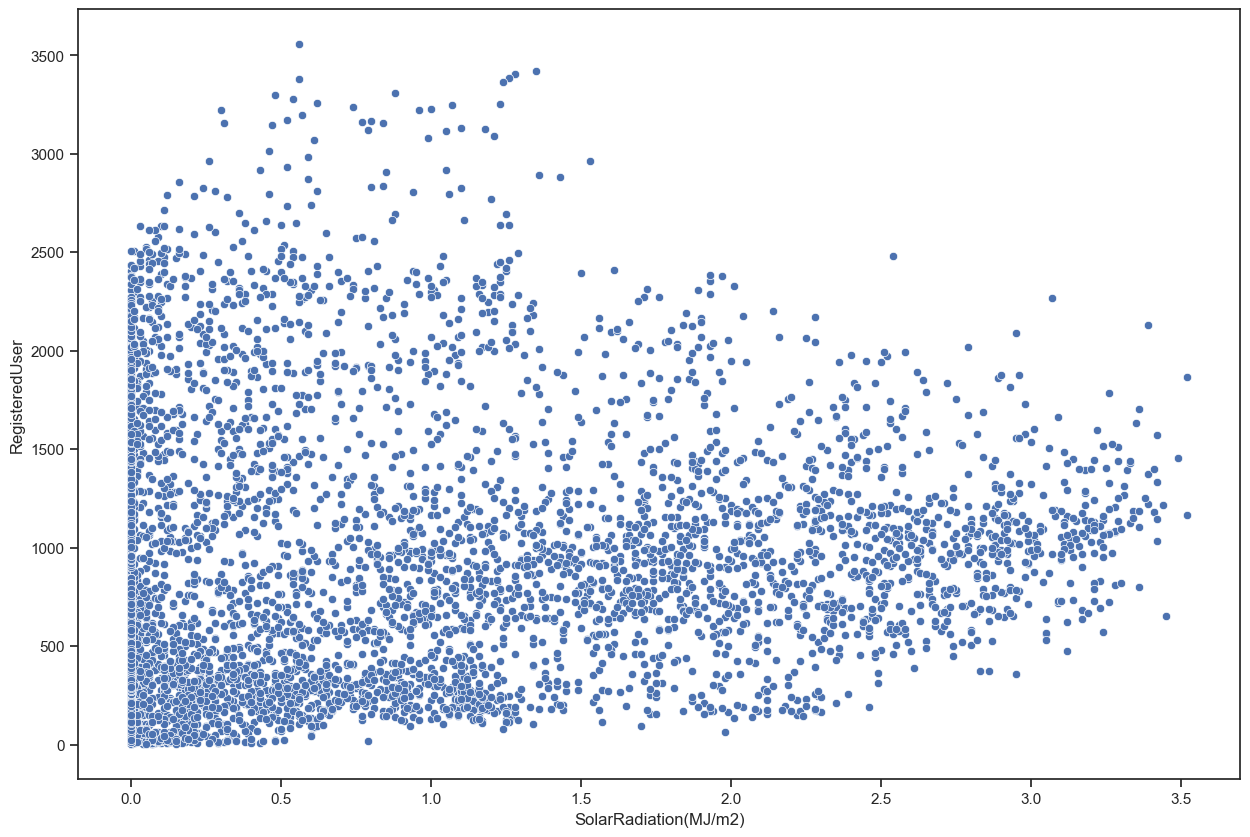

In [67]:
sns.scatterplot(x="SolarRadiation(MJ/m2)", y="RegisteredUser", data=df);

### Discussion:
****
`SolarRadiation` and `RegisteredUser` have a weak positive correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is low: 0.262.

### Correlation between `Rainfall` and `RegisteredUser`?
*****
**Hypotheses:**
> * **Null hypothesis ($H_0$)** : `Rainfall` and `RegisteredUser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Rainfall` and `RegisteredUser` are correlated.

**Significance level** = 0.05

In [68]:
pearsonr(df['RegisteredUser'], df['Rainfall(mm)'])

PearsonRResult(statistic=-0.1286206712150896, pvalue=1.6076384112045347e-32)

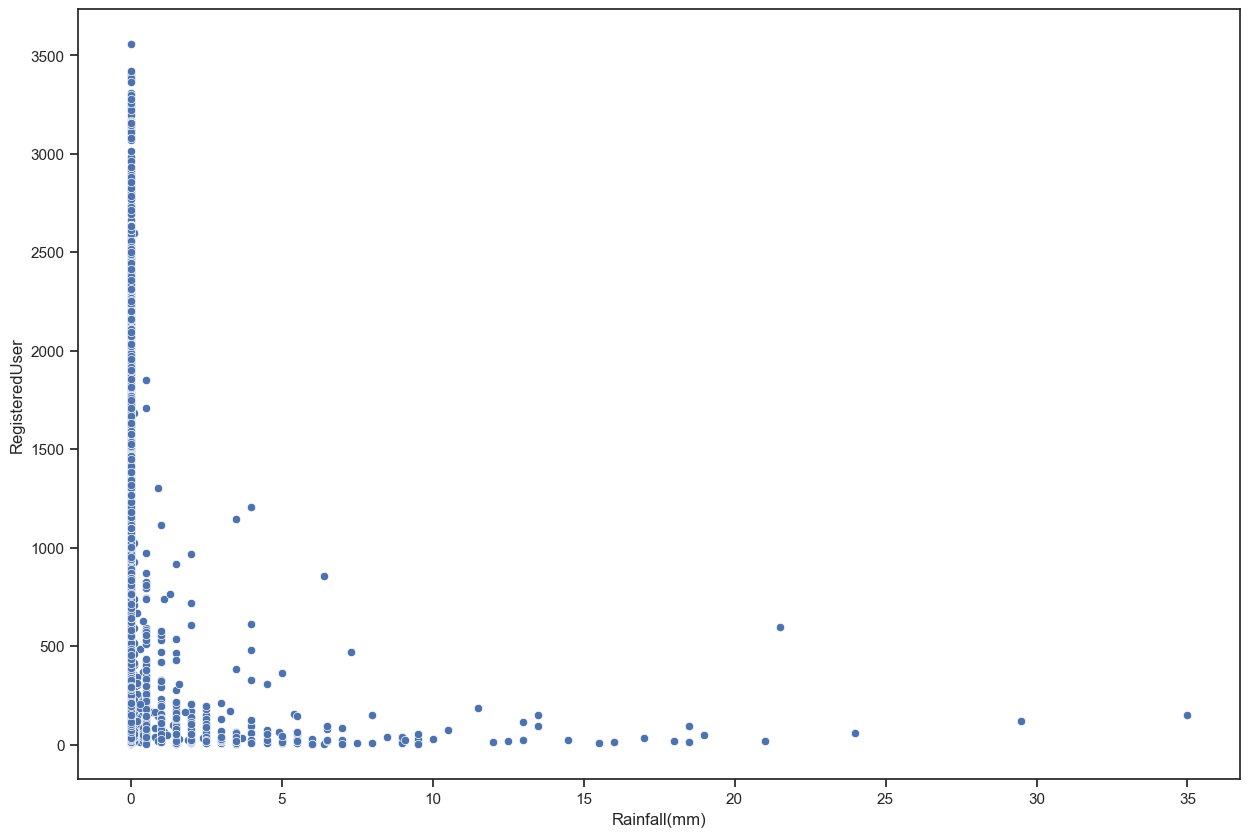

In [69]:
sns.scatterplot(x="Rainfall(mm)", y="RegisteredUser", data=df);

### Discussion:
****
`Rainfall` and `RegisteredUser` have a weak negative correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is low: -0.123.

From the scatterplot and the Pearson correlation test, it looks like the number of `RegisteredUser` decreases as `Rainfall` increases, and `RegisteredUser`s were more likely to rent e-scooters when there is no rain. Hence, an independent t-test is carried out to test the following hypotheses:
> * **Null hypothesis ($H_0$)** : The number of `RegisteredUser` on rainy days is NOT less than the number of `RegisteredUser` on days without rain.
> * **Alternative hypothesis ($H_1$)**: The number of `RegisteredUser` on rainy days is less than the number of `RegisteredUser` on days without rain.

**Significance level** = 0.05

A Levene's test must be conducted before the t-test to check the homogeneity of variance of the two samples: `RegisteredUser` on rainy days and `RegisteredUser` on days without rain.

In [70]:
stats.levene(df['RegisteredUser'][df['Rainfall(mm)'] != 0],
             df['RegisteredUser'][df['Rainfall(mm)'] == 0]
            )

LeveneResult(statistic=358.279529985488, pvalue=2.7341317280536724e-78)

The p-value from the Levene's test is less than the significance level (0.05), hence the test yields significant, which means that the two samples do not have equal variance.
Hence, the independent t-test must not assume equal variance between groups, and the Welch's t-test is conducted:

In [71]:
stats.ttest_ind(df['RegisteredUser'][df['Rainfall(mm)'] != 0], 
                df['RegisteredUser'][df['Rainfall(mm)'] == 0],
                equal_var=False,
                alternative='less')

Ttest_indResult(statistic=-43.72334990163756, pvalue=2.1535832191013712e-232)

### Discussion:
****
The number of `RegisteredUser` who rented e-scooter is higher when there is no rain on a given day because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***. The number of `RegisteredUser` on rainy days is less than the number of `RegisteredUser` on days without rain is True.


### Correlation between `Snowfall` and `RegisteredUser`?
*****
**Hypotheses:**
> * **Null hypothesis ($H_0$)** : `Snowfall` and `RegisteredUser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Snowfall` and `RegisteredUser` are correlated.

**Significance level** = 0.05

In [72]:
pearsonr(df['RegisteredUser'], df['Snowfall(cm)'])

PearsonRResult(statistic=-0.1504331270803798, pvalue=5.533927574576658e-44)

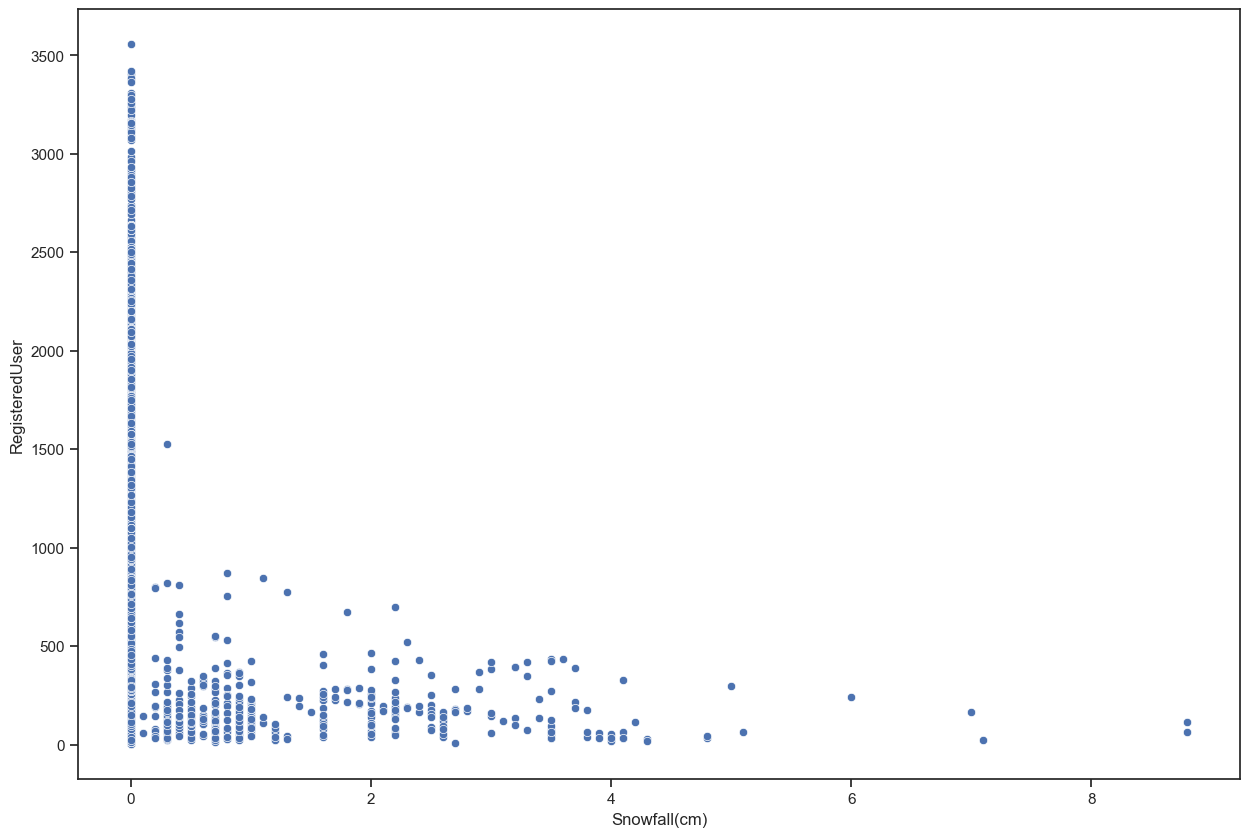

In [73]:
sns.scatterplot(x="Snowfall(cm)", y="RegisteredUser", data=df);

### Discussion:
****
`Snowfall` and `RegisteredUser` have a weak positive correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is low: -0.141.

From the scatterplot and the Pearson correlation test, it looks like the number of `RegisteredUser` decreases as `Snowfall` increases, and `RegisteredUser`s were more likely to rent e-scooters when there is no snow. Hence, an independent t-test is carried out to test the following hypotheses:
> * **Null hypothesis ($H_0$)** : The number of `RegisteredUser` on snowy days is NOT less than the number of `RegisteredUser` on days without snow.
> * **Alternative hypothesis ($H_1$)**: The number of `RegisteredUser` on snowy days is less than the number of `RegisteredUser` on days without snow.

**Significance level** = 0.05

A Levene's test must be conducted before the t-test to check the homogeneity of variance of the two samples: `RegisteredUser` on snowy days and `RegisteredUser` on days without snow.

In [74]:
stats.levene(df['RegisteredUser'][df['Snowfall(cm)'] != 0],
             df['RegisteredUser'][df['Snowfall(cm)'] == 0]
            )

LeveneResult(statistic=372.0693954326226, pvalue=3.618883725058455e-81)

The p-value from the Levene's test is less than the significance level (0.05), hence the test yields significant, which means that the two samples do not have equal variance.
Hence, the independent t-test must not assume equal variance between groups, and the Welch's t-test is conducted:

In [75]:
stats.ttest_ind(df['RegisteredUser'][df['Snowfall(cm)'] != 0], 
                df['RegisteredUser'][df['Snowfall(cm)'] == 0],
                equal_var=False,
                alternative='less')

Ttest_indResult(statistic=-54.38080075235938, pvalue=0.0)

### Discussion:
****
The number of `RegisteredUser` who rented e-scooter is higher when there is no snow on a given day because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***. The number of `RegisteredUser` on snowy days is less than the number of `RegisteredUser` on days without snow is True.


<a id="3.2.3"></a>
### 3.2.3 RQ3: Which weather factor(s) most likely affect the number of newly-registered e-scooter rentees?
****

### Correlation between `Temperature` and `Newregistereduser`?
*****
**Hypotheses:**
> * **Null hypothesis ($H_0$)** : `Temperature` and `Newregistereduser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Temperature` and `Newregistereduser` are correlated.

**Significance level** = 0.05

In [76]:
pearsonr(df['Newregistereduser'], df['Temperature(°C)'])

PearsonRResult(statistic=0.5434672447717155, pvalue=0.0)

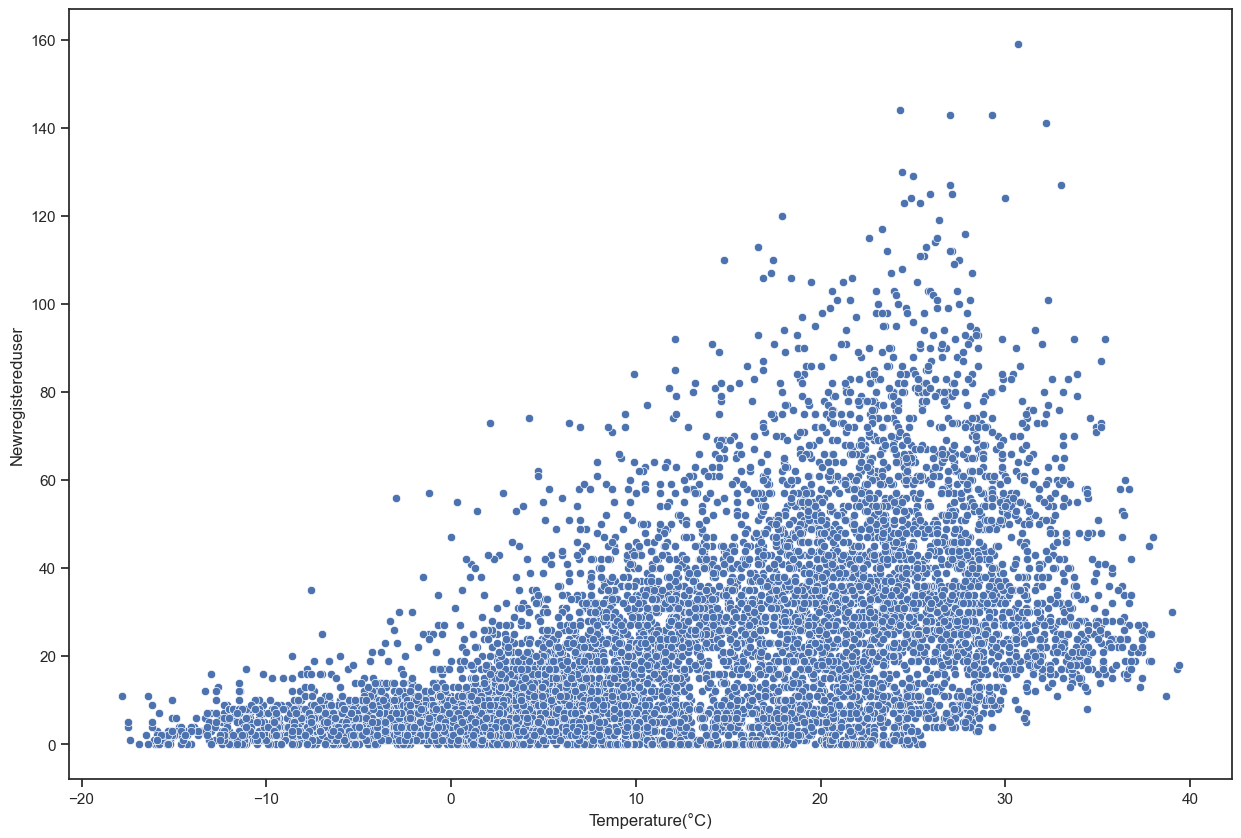

In [77]:
sns.scatterplot(x="Temperature(°C)", y="Newregistereduser", data=df);

### Discussion:
****
`Temperature` and `Newregistereduser` have a strong positive correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is high: 0.522.

### Correlation between `Humidity` and `Newregistereduser`?
*****
**Hypotheses:**
> * **Null hypothesis ($H_0$)** : `Humidity` and `Newregistereduser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Humidity` and `Newregistereduser` are correlated.

**Significance level** = 0.05

In [78]:
pearsonr(df['Newregistereduser'], df['Humidity(%)'])

PearsonRResult(statistic=-0.18655737345936138, pvalue=4.4088224771719966e-67)

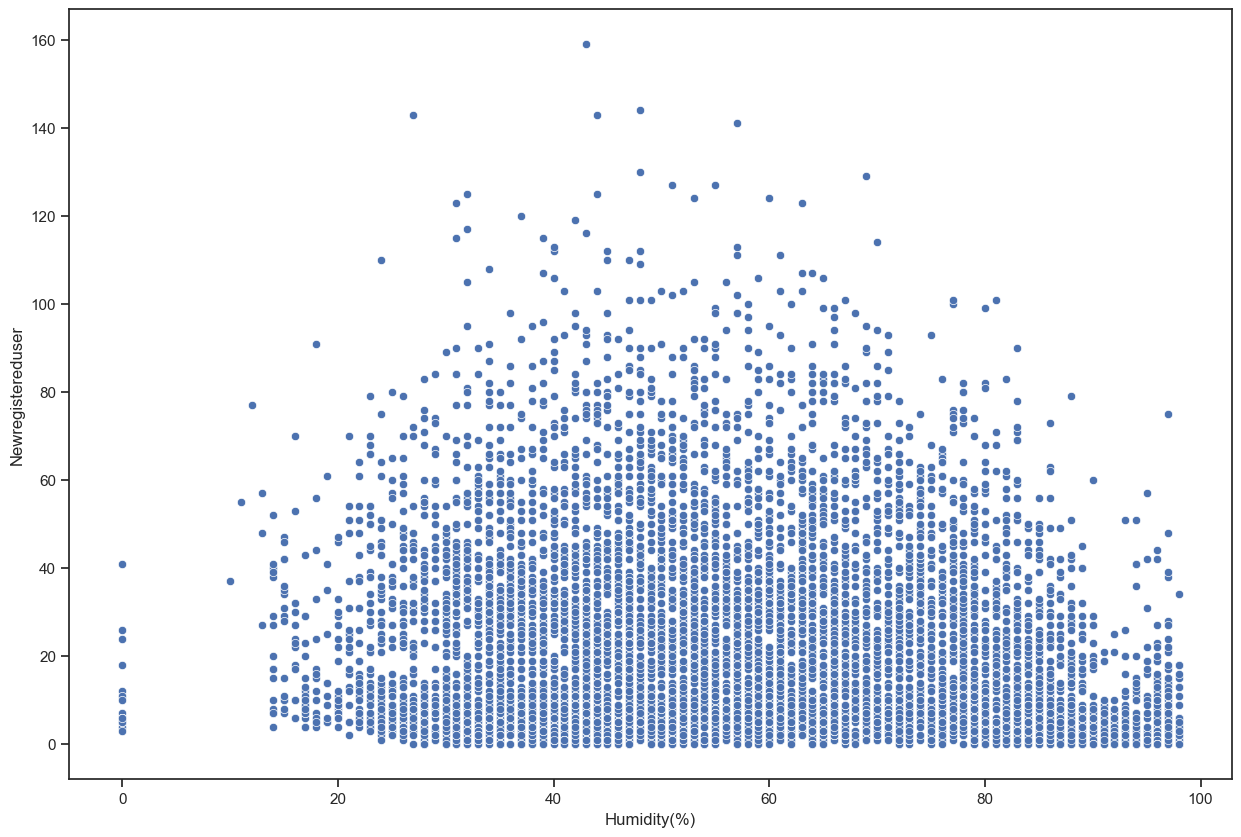

In [79]:
sns.scatterplot(x="Humidity(%)", y="Newregistereduser", data=df);

### Discussion:
****
`Humidity` and `Newregistereduser` have a weak negative correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is low: -0.185.

### Correlation between `Windspeed` and `Newregistereduser`?
*****
**Hypotheses:**
> * **Null hypothesis ($H_0$)** : `Windspeed` and `Newregistereduser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Windspeed` and `Newregistereduser` are correlated.

**Significance level** = 0.05

In [80]:
pearsonr(df['Newregistereduser'], df['Windspeed(m/s)'])

PearsonRResult(statistic=0.11691798109509396, pvalue=4.0018854754302925e-27)

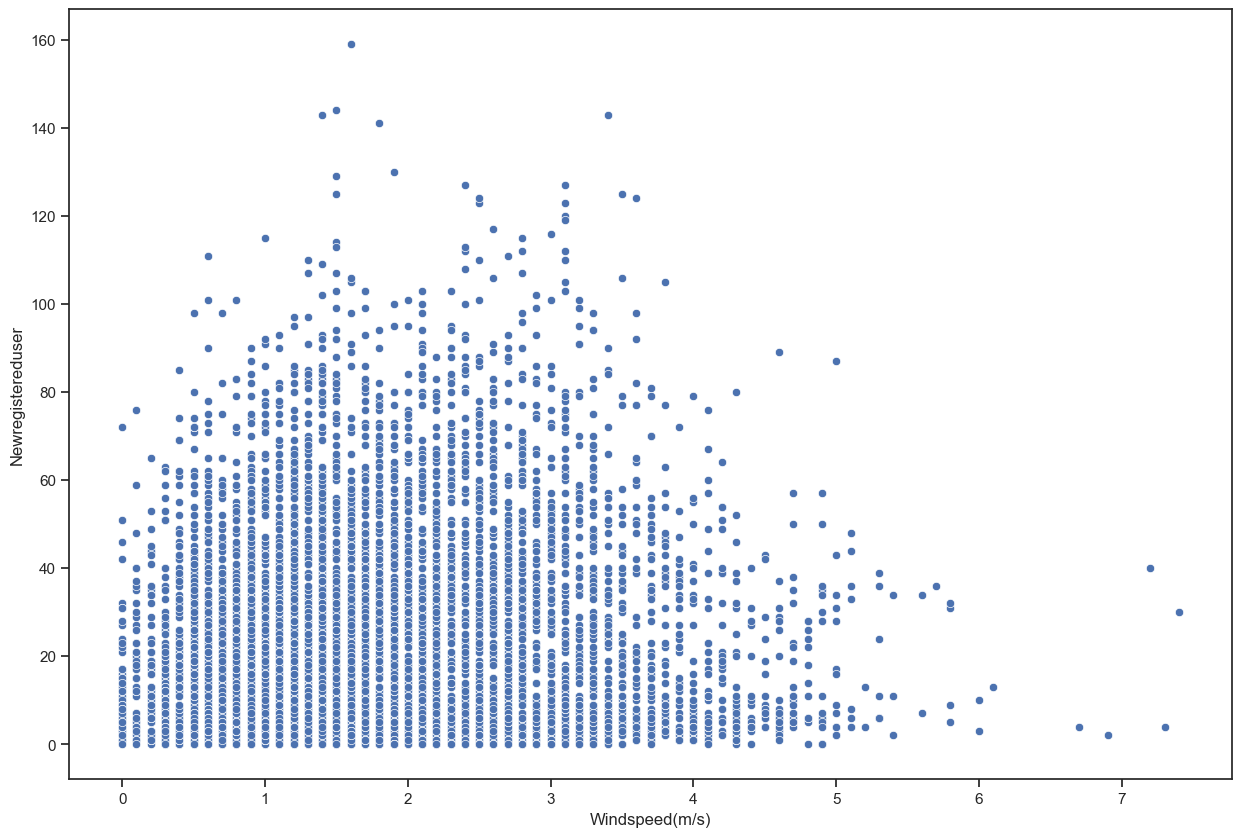

In [81]:
sns.scatterplot(x="Windspeed(m/s)", y="Newregistereduser", data=df);

### Discussion:
****
`Windspeed` and `Newregistereduser` have a weak positive correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is low: 0.114.

### Correlation between `Visibility` and `Newregistereduser`?
*****
**Hypotheses:**
> * **Null hypothesis ($H_0$)** : `Visibility` and `Newregistereduser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Visibility` and `Newregistereduser` are correlated.

**Significance level** = 0.05

In [82]:
pearsonr(df['Newregistereduser'], df['Visibility(10m)'])

PearsonRResult(statistic=0.19738430144119967, pvalue=4.983963583141846e-75)

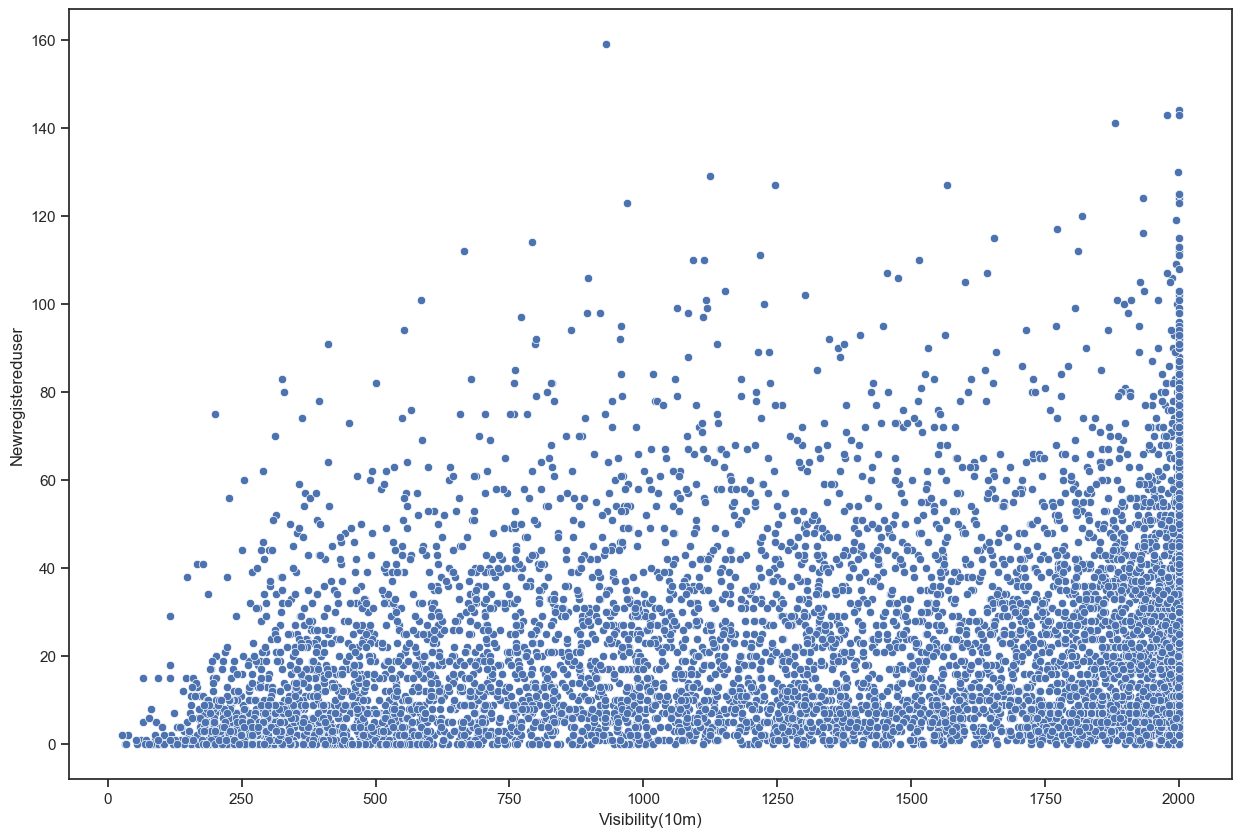

In [83]:
sns.scatterplot(x="Visibility(10m)", y="Newregistereduser", data=df);

### Discussion:
****
`Visibility` and `Newregistereduser` have a weak positive correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is low: 0.186.

### Correlation between `Dewpointtemperature` and `Newregistereduser`?
*****
**Hypotheses:**
> * **Null hypothesis ($H_0$)** : `Dewpointtemperature` and `Newregistereduser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Dewpointtemperature` and `Newregistereduser` are correlated.

**Significance level** = 0.05

In [84]:
pearsonr(df['Newregistereduser'], df['Dewpointtemperature(°C)'])

PearsonRResult(statistic=0.3896801446547805, pvalue=1.085976533490692e-304)

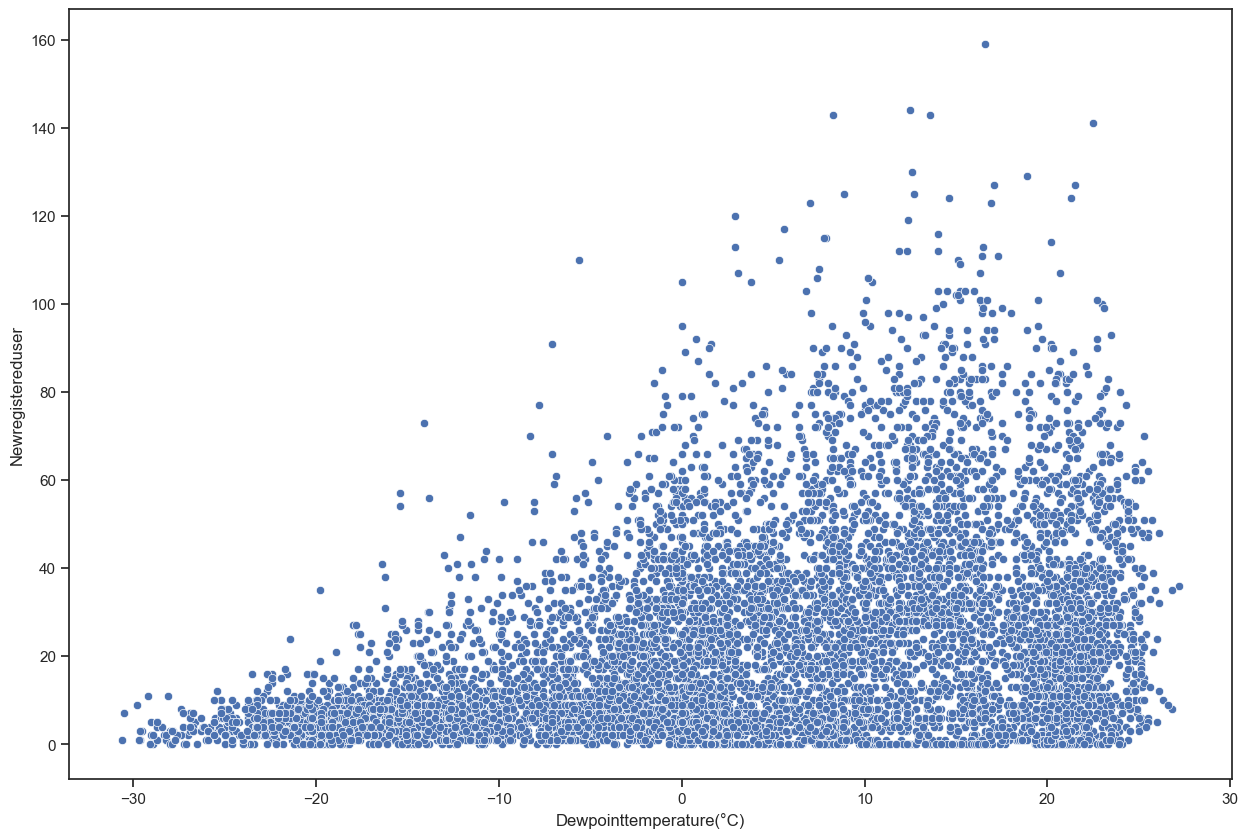

In [85]:
sns.scatterplot(x="Dewpointtemperature(°C)", y="Newregistereduser", data=df);

### Discussion:
****
`Dewpointtemperature` and `Newregistereduser` have a moderate positive correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is medium: 0.371.

### Correlation between `SolarRadiation` and `Newregistereduser`?
*****
**Hypotheses:**
> * **Null hypothesis ($H_0$)** : `SolarRadiation` and `Newregistereduser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `SolarRadiation` and `Newregistereduser` are correlated.

**Significance level** = 0.05

In [86]:
pearsonr(df['Newregistereduser'], df['SolarRadiation(MJ/m2)'])

PearsonRResult(statistic=0.25994660280705756, pvalue=1.2631634944798109e-130)

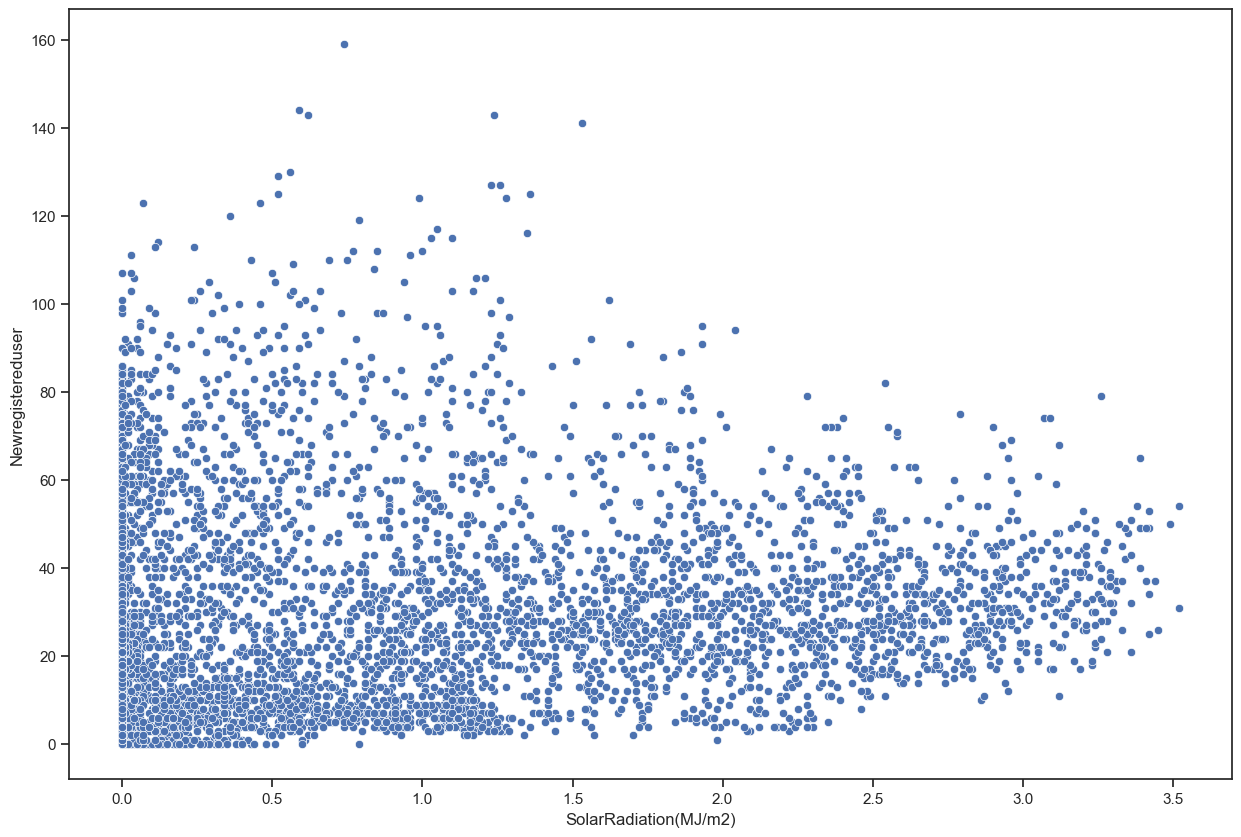

In [87]:
sns.scatterplot(x="SolarRadiation(MJ/m2)", y="Newregistereduser", data=df);

### Discussion:
****
`SolarRadiation` and `Newregistereduser` have a weak positive correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is low: 0.249.

### Correlation between `Rainfall` and `Newregistereduser`?
*****
**Hypotheses:**
> * **Null hypothesis ($H_0$)** : `Rainfall` and `Newregistereduser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Rainfall` and `Newregistereduser` are correlated.

**Significance level** = 0.05

In [88]:
pearsonr(df['Newregistereduser'], df['Rainfall(mm)'])

PearsonRResult(statistic=-0.12215527671127208, pvalue=1.786168204627286e-29)

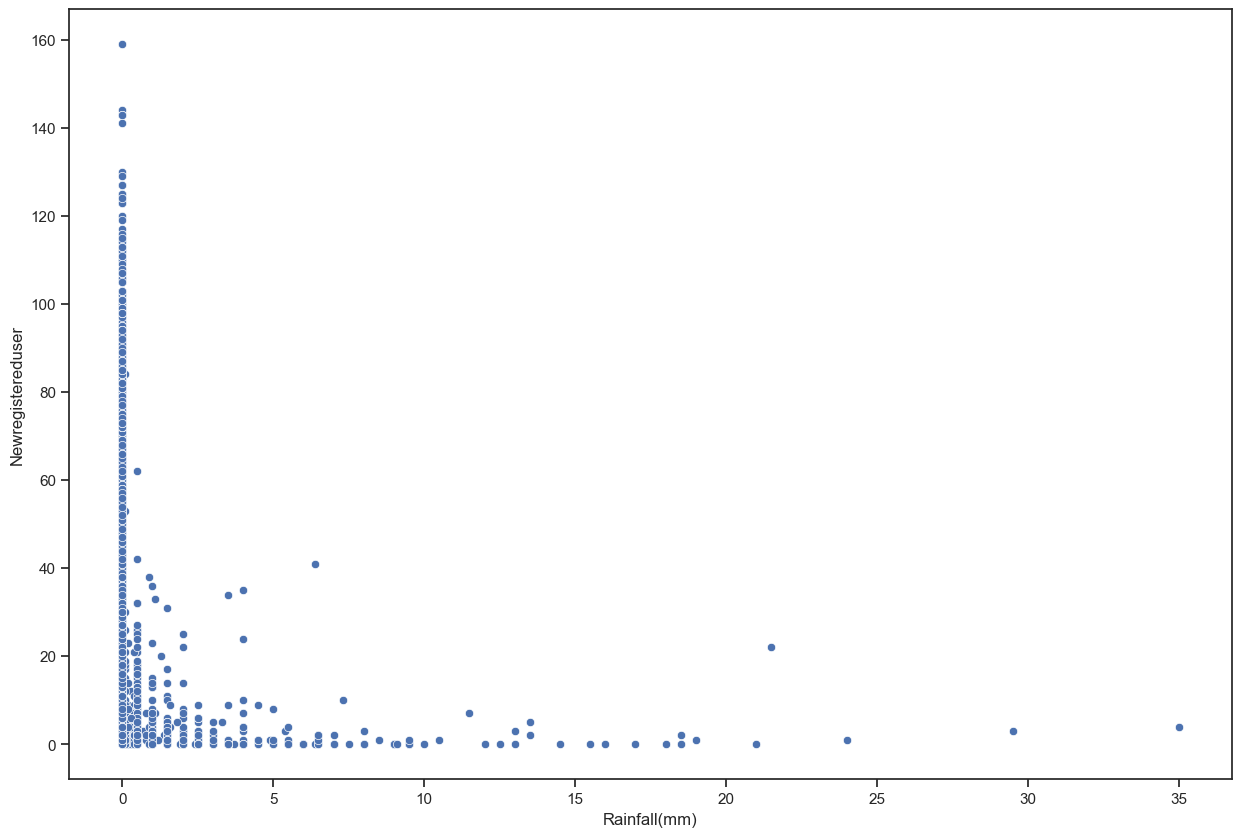

In [89]:
sns.scatterplot(x="Rainfall(mm)", y="Newregistereduser", data=df);

### Discussion:
****
`Rainfall` and `Newregistereduser` have a weak negative correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is low: -0.117.

From the scatterplot and the Pearson correlation test, it looks like the number of `Newregistereduser` decreases as `Rainfall` increases, and `Newregistereduser`s were more likely to rent e-scooters when there is no rain. Hence, an independent t-test is carried out to test the following hypotheses:
> * **Null hypothesis ($H_0$)** : The number of `Newregistereduser` on rainy days is NOT less than the number of `Newregistereduser` on days without rain.
> * **Alternative hypothesis ($H_1$)**: The number of `Newregistereduser` on rainy days is less than the number of `Newregistereduser` on days without rain.

**Significance level** = 0.05

A Levene's test must be conducted before the t-test to check the homogeneity of variance of the two samples: `Newregistereduser` on rainy days and `Newregistereduser` on days without rain.

In [90]:
stats.levene(df['Newregistereduser'][df['Rainfall(mm)'] != 0],
             df['Newregistereduser'][df['Rainfall(mm)'] == 0]
            )

LeveneResult(statistic=309.60444663277605, pvalue=4.316475290379389e-68)

The p-value from the Levene's test is less than the significance level (0.05), hence the test yields significant, which means that the two samples do not have equal variance.
Hence, the independent t-test must not assume equal variance between groups, and the Welch's t-test is conducted:

In [91]:
stats.ttest_ind(df['Newregistereduser'][df['Rainfall(mm)'] != 0], 
                df['Newregistereduser'][df['Rainfall(mm)'] == 0],
                equal_var=False,
                alternative='less')

Ttest_indResult(statistic=-43.40568905574137, pvalue=1.1835415472408892e-236)

### Discussion:
****
The number of `Newregistereduser` who rented e-scooter is higher when there is no rain on a given day because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***. The number of `Newregistereduser` on rainy days is less than the number of `Newregistereduser` on days without rain is True.


### Correlation between `Snowfall` and `Newregistereduser`?
*****
**Hypotheses:**
> * **Null hypothesis ($H_0$)** : `Snowfall` and `Newregistereduser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Snowfall` and `Newregistereduser` are correlated.

**Significance level** = 0.05

In [92]:
pearsonr(df['Newregistereduser'], df['Snowfall(cm)'])

PearsonRResult(statistic=-0.14113648608085005, pvalue=7.145887926355318e-39)

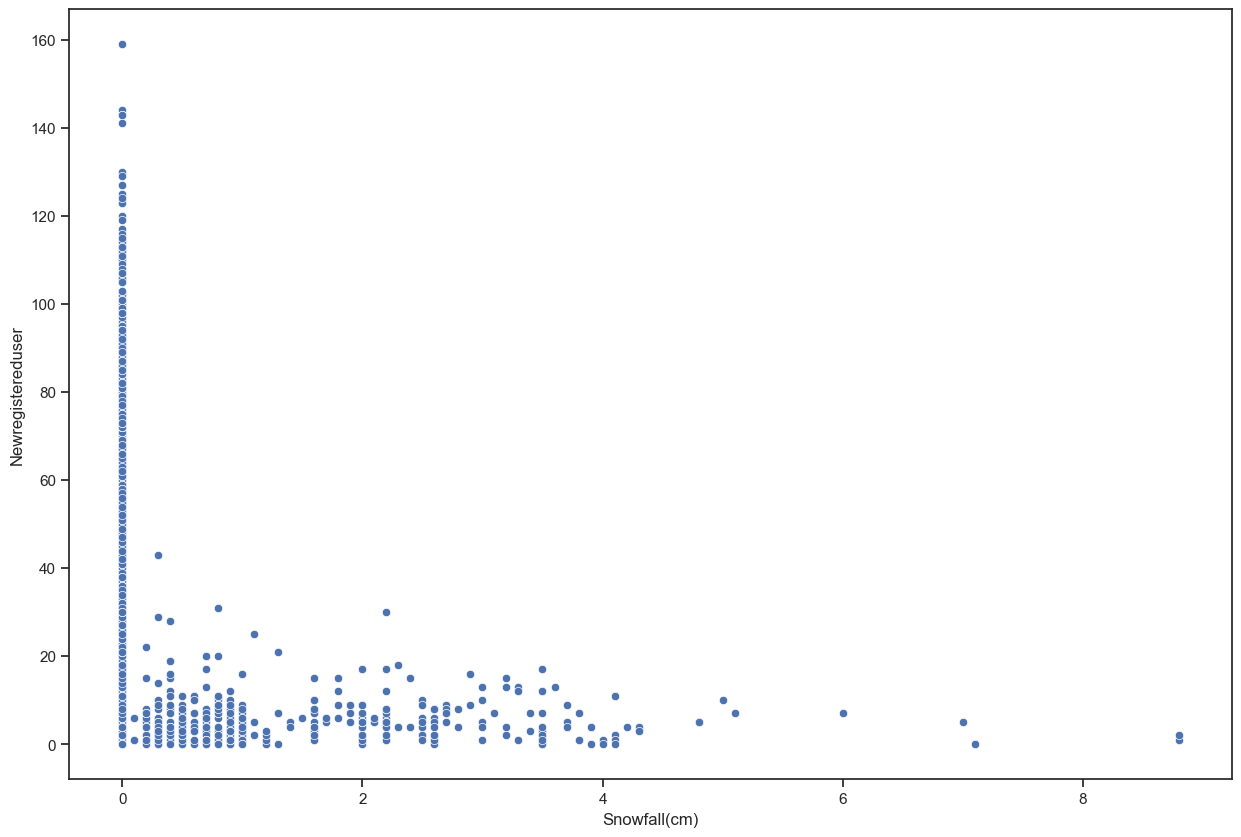

In [93]:
sns.scatterplot(x="Snowfall(cm)", y="Newregistereduser", data=df);

### Discussion:
****
`Snowfall` and `Newregistereduser` have a weak negative correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is low: -0.132.

From the scatterplot and the Pearson correlation test, it looks like the number of `Newregistereduser` decreases as `Snowfall` increases, and `Newregistereduser`s were more likely to rent e-scooters when there is no snow. Hence, an independent t-test is carried out to test the following hypotheses:
> * **Null hypothesis ($H_0$)** : The number of `Newregistereduser` on snowy days is NOT less than the number of `Newregistereduser` on days without snow.
> * **Alternative hypothesis ($H_1$)**: The number of `Newregistereduser` on snowy days is less than the number of `Newregistereduser` on days without snow.

**Significance level** = 0.05

A Levene's test must be conducted before the t-test to check the homogeneity of variance of the two samples: `Newregistereduser` on snowy days and `Newregistereduser` on days without snow.

In [94]:
stats.levene(df['Newregistereduser'][df['Snowfall(cm)'] != 0],
             df['Newregistereduser'][df['Snowfall(cm)'] == 0]
            )

LeveneResult(statistic=321.68127703923676, pvalue=1.2563765543573665e-70)

The p-value from the Levene's test is less than the significance level (0.05), hence the test yields significant, which means that the two samples do not have equal variance.
Hence, the independent t-test must not assume equal variance between groups, and the Welch's t-test is conducted:

In [95]:
stats.ttest_ind(df['Newregistereduser'][df['Snowfall(cm)'] != 0], 
                df['Newregistereduser'][df['Snowfall(cm)'] == 0],
                equal_var=False,
                alternative='less')

Ttest_indResult(statistic=-53.77503562919208, pvalue=0.0)

### Discussion:
****
The number of `Newregistereduser` who rented e-scooter is higher when there is no snow on a given day because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***. The number of `CasualUser` on snowy days is less than the number of `Newregistereduser` on days without snow is True.


<a id="3.2.4"></a>
### 3.2.4. RQ4/5: Which season are people most/least likely to rent an e-scooter?
****

### Levene's Test for Homogeneity of Variance

In [96]:
stats.levene(df['CasualUser'][df['Seasons'] == 'Autumn'],
             df['CasualUser'][df['Seasons'] == 'Spring'],
             df['CasualUser'][df['Seasons'] == 'Summer'],
             df['CasualUser'][df['Seasons'] == 'Winter'],
            )

LeveneResult(statistic=639.5455262124634, pvalue=0.0)

In [97]:
stats.levene(df['RegisteredUser'][df['Seasons'] == 'Autumn'],
             df['RegisteredUser'][df['Seasons'] == 'Spring'],
             df['RegisteredUser'][df['Seasons'] == 'Summer'],
             df['RegisteredUser'][df['Seasons'] == 'Winter'],
            )

LeveneResult(statistic=661.070303117788, pvalue=0.0)

In [98]:
stats.levene(df['Newregistereduser'][df['Seasons'] == 'Autumn'],
             df['Newregistereduser'][df['Seasons'] == 'Spring'],
             df['Newregistereduser'][df['Seasons'] == 'Summer'],
             df['Newregistereduser'][df['Seasons'] == 'Winter'],
            )

LeveneResult(statistic=582.0486792844612, pvalue=0.0)

### Discussion:
****
The Levene's test null hypothesis for `CasualUser`, `RegisteredUser`, and `Newregistereduser` sorted by `Seasons` is ***REJECTED*** since the p-value is less than the significance level (0.05) and infer that at least one pair of groups has uneven variance. Therefore, the traditional ANOVA method to compare the means of four groups of different `Seasons` cannot be used. A non-parametric version of ANOVA, Welch's ANOVA will be used instead, since Welch's ANOVA does not assume homogeneity of variance between groups. The same reason applies to why Games-Howell post-hoc test is used instead of Tukey HSD.

### Which `season` are `CasualUser` most/least likely to rent an e-scooter?
*****
**Hypotheses:**
> * **Null hypothesis ($H_0$)** : The number of `CasualUser` in four seasons have the same mean.
> * **Alternative hypothesis ($H_1$)**: The number of `CasualUser` in four seasons have different means.

**Significance level** = 0.05

### CasualUser

In [99]:
pg.welch_anova(dv='CasualUser', between='Seasons', data=df)

Source  ddof1        ddof2           F  p-unc       np2
0  Seasons      3  3773.214404  2072.76055    0.0  0.236082

### Discussion:
****
The p-value from the Welch's ANOVA test is less than the significance level (0.05), therefore $H_0$ that says all seasons have the same mean is ***REJECTED***. However, the test did not point out which season is different from the others. The Games-Howell post-hoc test is conducted to see which season has a different mean.

In [100]:
pg.pairwise_gameshowell(dv='CasualUser', between='Seasons', data=df)

A       B     mean(A)     mean(B)        diff        se          T  \
0  Autumn  Spring  369.690243  299.034722   70.655520  8.007454   8.823719   
1  Autumn  Summer  369.690243  414.281703  -44.591460  8.422381  -5.294401   
2  Autumn  Winter  369.690243   80.084347  289.605896  5.932728  48.814966   
3  Spring  Summer  299.034722  414.281703 -115.246981  8.233209 -13.997820   
4  Spring  Winter  299.034722   80.084347  218.950375  5.660961  38.677242   
5  Summer  Winter  414.281703   80.084347  334.197356  6.234074  53.608180   

            df          pval    hedges  
0  4051.390723  1.265654e-13  0.276066  
1  4142.216287  7.509959e-07 -0.164792  
2  2115.903335  0.000000e+00  1.528944  
3  4331.242752  0.000000e+00 -0.423546  
4  2379.674046  5.699885e-13  1.178074  
5  2391.425039  0.000000e+00  1.623982

### RegisteredUser

In [101]:
pg.welch_anova(dv='RegisteredUser', between='Seasons', data=df)

Source  ddof1        ddof2            F  p-unc       np2
0  Seasons      3  3810.618515  2030.636523    0.0  0.236458

In [102]:
pg.pairwise_gameshowell(dv='RegisteredUser', between='Seasons', data=df)

A       B      mean(A)      mean(B)        diff         se          T  \
0  Autumn  Spring   924.110480   746.254167  177.856313  19.341242   9.195703   
1  Autumn  Summer   924.110480  1034.073370 -109.962889  20.314097  -5.413132   
2  Autumn  Winter   924.110480   225.360465  698.750015  14.401100  48.520599   
3  Spring  Summer   746.254167  1034.073370 -287.819203  19.823650 -14.518981   
4  Spring  Winter   746.254167   225.360465  520.893702  13.700592  38.019794   
5  Summer  Winter  1034.073370   225.360465  808.712904  15.042777  53.760879   

            df          pval    hedges  
0  4048.442153  0.000000e+00  0.287705  
1  4141.397752  3.915525e-07 -0.168488  
2  2142.653190  0.000000e+00  1.519724  
3  4333.065588  6.026291e-13 -0.439315  
4  2414.102103  0.000000e+00  1.158048  
5  2421.273077  0.000000e+00  1.628607

### Discussion:
****
Based on the result, the difference between Summer and Winter is the highest. Moreover, in the mean of the Summer is the highest while the Winter is the lowest. Since then, Summer has the most user, while the Winter has the least consumers

### Newregistereduser

In [103]:
pg.welch_anova(dv='Newregistereduser', between='Seasons', data=df)

Source  ddof1        ddof2            F  p-unc      np2
0  Seasons      3  3764.663608  1899.014857    0.0  0.22114

In [104]:
pg.pairwise_gameshowell(dv='Newregistereduser', between='Seasons', data=df)

A       B    mean(A)    mean(B)       diff        se          T  \
0  Autumn  Spring  29.558596  23.886574   5.672022  0.666073   8.515622   
1  Autumn  Summer  29.558596  33.479167  -3.920571  0.708717  -5.531925   
2  Autumn  Winter  29.558596   6.445116  23.113479  0.491858  46.992192   
3  Spring  Summer  23.886574  33.479167  -9.592593  0.695153 -13.799246   
4  Spring  Winter  23.886574   6.445116  17.441458  0.472104  36.944096   
5  Summer  Winter  33.479167   6.445116  27.034050  0.530575  50.952368   

            df          pval    hedges  
0  4056.421132  0.000000e+00  0.266427  
1  4142.252988  2.013253e-07 -0.172185  
2  2113.090657  0.000000e+00  1.471852  
3  4313.488554  1.667777e-12 -0.417538  
4  2373.559918  2.930989e-14  1.125284  
5  2378.957593  0.000000e+00  1.543528

### Discussion:
****
Based on the result, the difference between Summer and Winter is the highest. Moreover, in the mean of the Summer is the highest while the Winter is the lowest. Since then, Summer has the most user, while the Winter has the least consumers

<a id="3.2.5"></a>
### 3.2.5.  RQ6/7: Which station has the most/least e-scooter rent in a single day?
****

In [105]:
stats.levene(df['TotalUser'][df['StationNumber'] == 1],
             df['TotalUser'][df['StationNumber'] == 2],
             df['TotalUser'][df['StationNumber'] == 3],
             df['TotalUser'][df['StationNumber'] == 4],
             df['TotalUser'][df['StationNumber'] == 5],
             df['TotalUser'][df['StationNumber'] == 6],
             df['TotalUser'][df['StationNumber'] == 7],
             df['TotalUser'][df['StationNumber'] == 8],
             df['TotalUser'][df['StationNumber'] == 9],
             df['TotalUser'][df['StationNumber'] == 10],
             df['TotalUser'][df['StationNumber'] == 11],
             df['TotalUser'][df['StationNumber'] == 12],
             df['TotalUser'][df['StationNumber'] == 13],
             df['TotalUser'][df['StationNumber'] == 14],
             df['TotalUser'][df['StationNumber'] == 15],
             df['TotalUser'][df['StationNumber'] == 16],
             df['TotalUser'][df['StationNumber'] == 17],
             df['TotalUser'][df['StationNumber'] == 18],
             df['TotalUser'][df['StationNumber'] == 19],
             df['TotalUser'][df['StationNumber'] == 20],
             df['TotalUser'][df['StationNumber'] == 21],
             df['TotalUser'][df['StationNumber'] == 22],
             df['TotalUser'][df['StationNumber'] == 23],
             df['TotalUser'][df['StationNumber'] == 24],
            )

LeveneResult(statistic=238.39751547844725, pvalue=0.0)

### Discussion:
****
The Levene's tests for `CasualUser`, `RegisteredUser`, and `Newregisteruser` sorted by `StationNumber` all show significant. Hence, the homogeneity of variance assumption for ANOVA is violated. The Welch's ANOVA method with Games-Howell post-hoc test will be used instead.

### Is there difference in the number of `CasualUser` between stations?
**Hypotheses:**
> * **Null hypothesis ($H_0$)** : The number of `CasualUser` at all stations has the same mean.
> * **Alternative hypothesis ($H_1$)**: The number of `CasualUser` at stations has different means.

**Significance level** = 0.05

In [106]:
pg.welch_anova(dv='TotalUser', between='StationNumber', data=df)

Source  ddof1        ddof2           F  p-unc       np2
0  StationNumber     23  3034.992546  370.995751    0.0  0.312949

In [107]:
pg.pairwise_gameshowell(dv='TotalUser', between='StationNumber', data=df)

A   B      mean(A)      mean(B)        diff         se          T  \
0     1   2   804.043823   630.095705  173.948118  34.913244   4.982296   
1     1   3   804.043823   443.190797  360.853026  31.750219  11.365371   
2     1   4   804.043823   297.341851  506.701972  29.563344  17.139535   
3     1   5   804.043823   192.065130  611.978693  28.373768  21.568467   
4     1   6   804.043823   202.110696  601.933127  28.473288  21.140274   
..   ..  ..          ...          ...         ...        ...        ...   
271  21  23  1587.352563  1361.432936  225.919627  78.095878   2.892850   
272  21  24  1587.352563   988.956072  598.396491  70.199028   8.524285   
273  22  23  1527.268739  1361.432936  165.835803  75.520189   2.195913   
274  22  24  1527.268739   988.956072  538.312666  67.321885   7.996102   
275  23  24  1361.432936   988.956072  372.476863  61.243187   6.081931   

             df          pval    hedges  
0    659.300914  2.074697e-04  0.375688  
1    555.961942  1.693090e-13  0.857001  
2    452.284633  1.962874e-13  1.292399  
3    391.074551  1.096900e-13  1.626360  
4    396.214527  3.543832e-13  1.594073  
..          ...           ...       ...  
271  678.715312  3.699689e-01  0.217516  
272  573.724363  4.551914e-14  0.640948  
273  691.024964  8.712678e-01  0.165112  
274  593.789903  2.084000e-12  0.601233  
275  641.467757  5.573421e-07  0.457305  

[276 rows x 10 columns]

<a id="3.2.6"></a>
### 3.2.6.  RQ8: Does `Seasons` affect e-scooter stations closure?
****

In [108]:
chi2table = pd.crosstab(df['Seasons'], df['OperationDay'])

In [109]:
chi2table

OperationDay   Yes
Seasons           
Autumn        1937
Spring        2160
Summer        2208
Winter        2150

In [110]:
stats.chi2_contingency(chi2table)

(0.0,
 1.0,
 0,
 array([[1937.],
        [2160.],
        [2208.],
        [2150.]]))

In [111]:
pearsonr(df['Temperature(°C)'], df['Dewpointtemperature(°C)'])

PearsonRResult(statistic=0.9144706816630216, pvalue=0.0)

<a id="4"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>4. References</strong></h1>

*****

<a id="Link1"></a>
- [1] [World: Highest Temperature](https://wmo.asu.edu/content/world-highest-temperature)

<a id="Link2"></a>
- [2] [The Most Humid Cities In The World, Mapped](https://digg.com/nature/link/most-humid-cities-in-the-world-mapped-ocnm3EUU3n#:~:text=They%20scanned%20over%2018%2C000%20cities,Here's%20what%20they%20found.&text=The%20world's%20most%20humid%20city,neighboring%20countries%20Bangladesh%20and%20Myanmar.)

<a id="Link3"></a>
- [3] [Who is afraid of non-normal data? Choosing between parametric and non-parametric tests](https://eje.bioscientifica.com/view/journals/eje/182/2/EJE-19-0922.xml#:~:text=The%20t%2Dtest%20is%20not,distributions%20of%20the%20outcome%20variable.)